Hi Everyone!

This is one of my first kernels on Kaggle, so any input is appreciated. Like many people starting out with machine learning, visualizing classification boundaries in high dimensions is often difficult to comprehend. I intended this kernel to teach me how different classifiers place boundaries in feature space. Ofcourse since we are limited to how many dimensions we can visualize, I used different types to kernel PCA's to see their effect on different types of classifiers. Lets go ahead and load the data/libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from matplotlib.colors import ListedColormap

data = pd.read_csv('../input/data.csv')

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))



data.csv



Checking for missing values... Looks like one of the columns is missing data for all the rows. We can go ahead and eliminate it.

In [2]:
data.isnull().sum()
data.drop('Unnamed: 32', axis = 1, inplace = True )

We can count how many people have malignant and benign tumors . Now lets also split the data into our features and labels, then map our labels to integers.

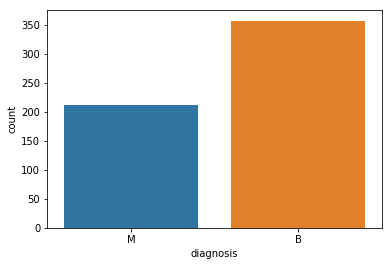

In [3]:

sns.countplot(x = 'diagnosis', data = data)


x = data.iloc[:, 3:]

y = data.diagnosis
y = y.map({'M':1,'B':0})

The features looks like they are broken into three main categories, value means, standard deivations, and 'worst'. We can check to see if there are any correlations between these subsets of features

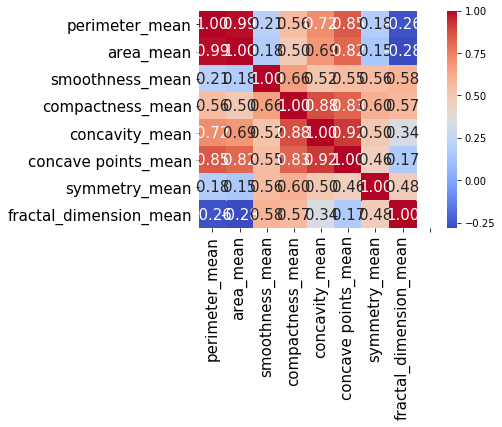

In [4]:
x.columns
features_mean = x.columns[1:9]
features_se = x.columns[9:19]
features_worst = x.columns[19:]

#Correlation between sets of features
corr = x[features_mean].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_mean, size = 15)
g.set_yticklabels(rotation=0, labels = features_mean, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (15,15)





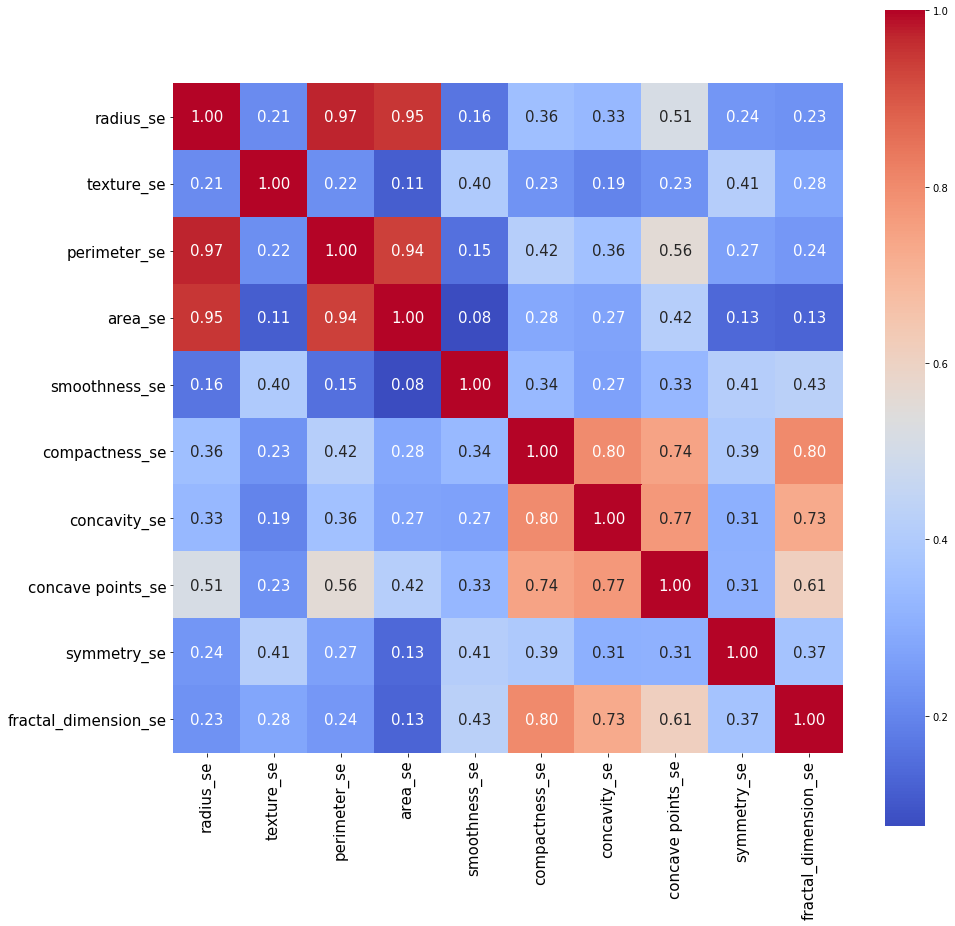

In [5]:
corr = x[features_se].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_se, size = 15)
g.set_yticklabels(rotation=0, labels = features_se, size = 15)
g.set_xticks(np.arange(.5,10.5,1))
plt.rcParams["figure.figsize"] = (15,15)

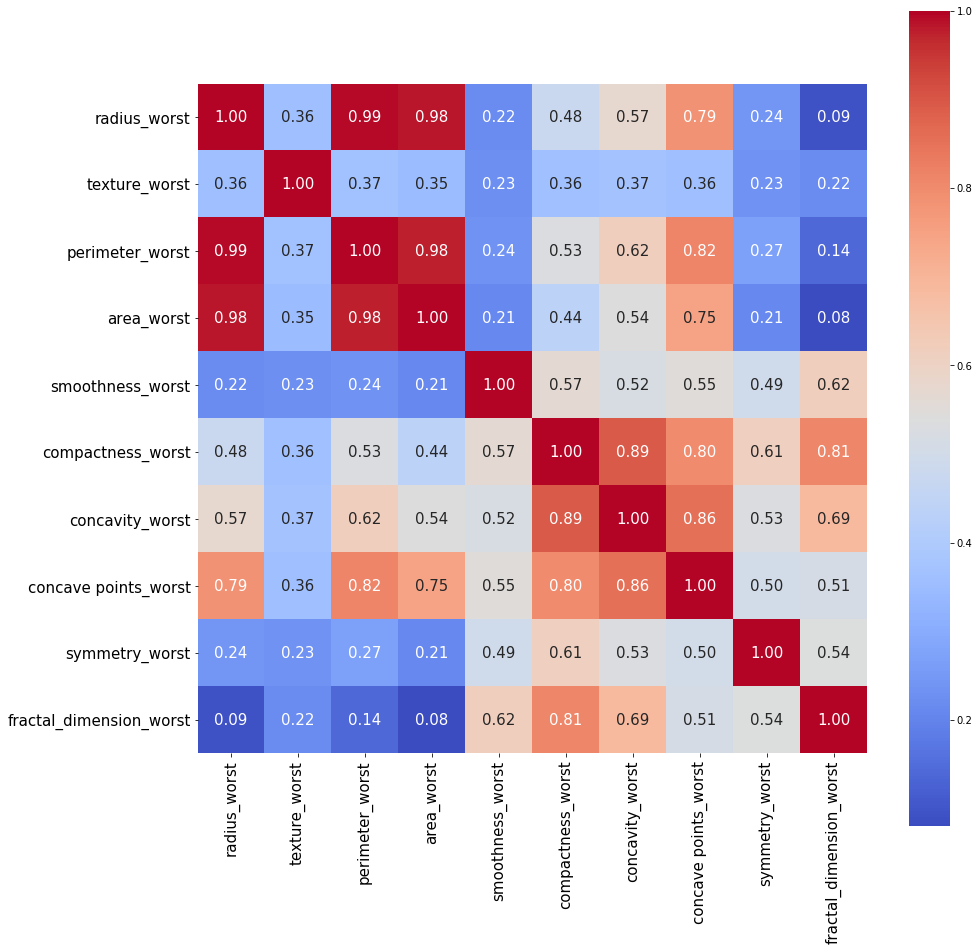

In [6]:
corr = x[features_worst].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(      rotation=90, labels = features_worst, size = 15)
g.set_yticklabels(rotation=0, labels = features_worst, size = 15)
g.set_xticks(np.arange(.5,10.5,1))
plt.rcParams["figure.figsize"] = (15,15)

Lets go ahead and move on to preprocessing our data in order to apply our ML classifiers. In addition, we need to break out or data into a training and test set

In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


#Split data to get hold out test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1)

The next chunk of code will help us automate the next few steps. This function accepts three inputs:
1) The kernel used for PCA
2) Which classifier we will be using
3) The name of the classifier (used for plot title)

On the advice of some comments I decided to create a large subplot which will show the summary of boundary lines for each classifier and kernel PCA. This is a consice way of looking at the boundary lines, however I have kept the original breakdown of the test and training boundary lines below if you would like further detail. As you can see some of the arguments for this function are not needed for this summary plot, however all the arguments are needed for the graphs below.

In [8]:
def BoundaryLine(kernel, algo, algo_name):
    reduction = KernelPCA(n_components=2, kernel = kernel)
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    
    classifier = algo
    classifier.fit(x_train_reduced, y_train)
    
    y_pred = classifier.predict(x_test_reduced)
    

    #Boundary Line
    X_set, y_set = np.concatenate([x_train_reduced, x_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.5, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    #plt.title('{} Boundary Line with {} PCA' .format(algo_name, kernel))
    #plt.xlabel('Component 1')
    #plt.ylabel('Component 2')
    #plt.legend()
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)

    







/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


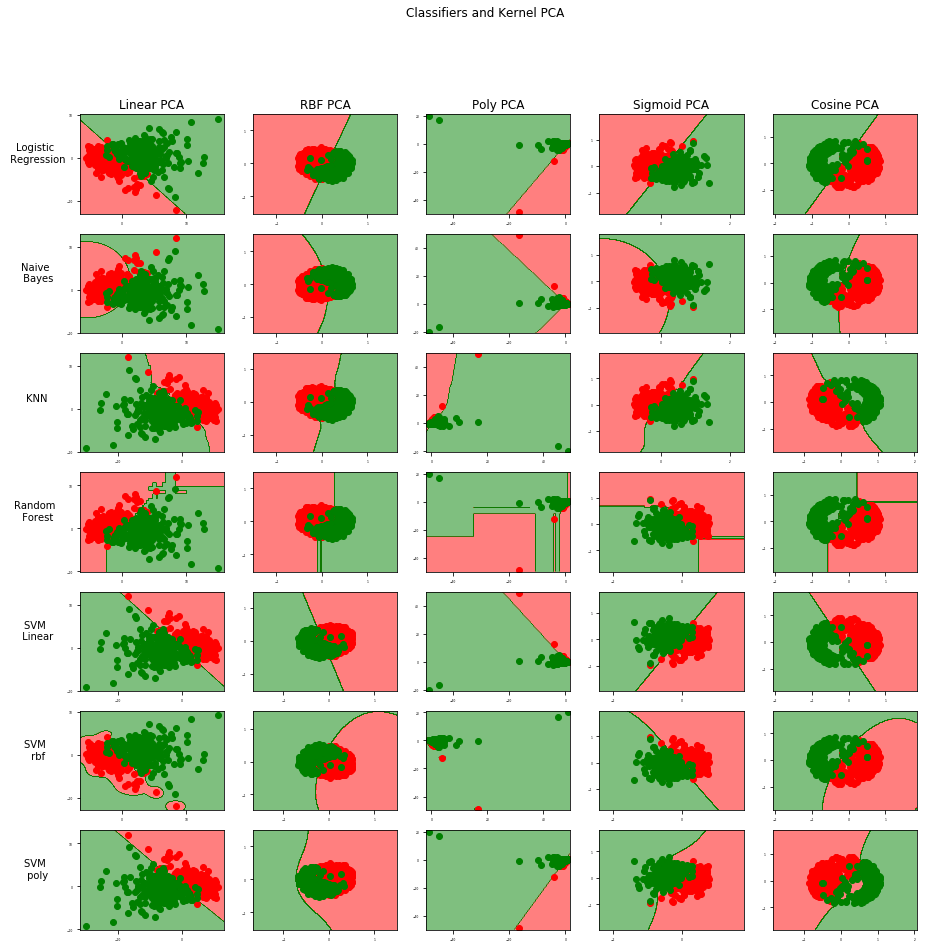

In [9]:
fig = plt.figure()

fig.suptitle('Classifiers and Kernel PCA')
#Logistic Regression   
from sklearn.linear_model import LogisticRegression
ax = plt.subplot(7,5,1)
ax.set_title('Linear PCA')
ax.set_ylabel('Logistic \n Regression', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', LogisticRegression(), "Logistic Regression")

ax = plt.subplot(7,5,2)
ax.set_title('RBF PCA')
BoundaryLine('rbf', LogisticRegression(), "Logistic Regression")

ax = plt.subplot(7,5,3)
ax.set_title('Poly PCA')
BoundaryLine('poly', LogisticRegression(), "Logistic Regression")

ax = plt.subplot(7,5,4)
ax.set_title('Sigmoid PCA')
BoundaryLine('sigmoid', LogisticRegression(), "Logistic Regression")

ax = plt.subplot(7,5,5)
ax.set_title('Cosine PCA')
BoundaryLine('cosine', LogisticRegression(), "Logistic Regression")


#Naive Bayes
from sklearn.naive_bayes import GaussianNB
ax = plt.subplot(7,5,6)
ax.set_ylabel('Naive \n Bayes', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', GaussianNB(), "Naive Bayes")
ax = plt.subplot(7,5,7)
BoundaryLine('rbf', GaussianNB(), "Naive Bayes")
ax = plt.subplot(7,5,8)
BoundaryLine('poly', GaussianNB(), "Naive Bayes")
ax = plt.subplot(7,5,9)
BoundaryLine('sigmoid', GaussianNB(), "Naive Bayes")
ax = plt.subplot(7,5,10)
BoundaryLine('cosine', GaussianNB(), "Naive Bayes")

#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
ax = plt.subplot(7,5,11)
ax.set_ylabel('KNN', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', KNeighborsClassifier(), "KNN")
ax = plt.subplot(7,5,12)
BoundaryLine('rbf', KNeighborsClassifier(), "KNN")
ax = plt.subplot(7,5,13)
BoundaryLine('poly', KNeighborsClassifier(), "KNN")
ax = plt.subplot(7,5,14)
BoundaryLine('sigmoid', KNeighborsClassifier(), "KNN")
ax = plt.subplot(7,5,15)
BoundaryLine('cosine', KNeighborsClassifier(), "KNN")

#Random Forest
from sklearn.ensemble import RandomForestClassifier
ax = plt.subplot(7,5,16)
ax.set_ylabel('Random \n Forest', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', RandomForestClassifier(), "Random Forest")
ax = plt.subplot(7,5,17)
BoundaryLine('rbf', RandomForestClassifier(), "Random Forest")
ax = plt.subplot(7,5,18)
BoundaryLine('poly', RandomForestClassifier(), "Random Forest")
ax = plt.subplot(7,5,19)
BoundaryLine('sigmoid', RandomForestClassifier(), "Random Forest")
ax = plt.subplot(7,5,20)
BoundaryLine('cosine', RandomForestClassifier(), "Random Forest")

#Support Vector - linear
from sklearn.svm import SVC
ax = plt.subplot(7,5,21)
ax.set_ylabel('SVM \n Linear', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', SVC(kernel = 'linear'), "SVM - Linear")
ax = plt.subplot(7,5,22)
BoundaryLine('rbf', SVC(kernel = 'linear'), "SVM - Linear")
ax = plt.subplot(7,5,23)
BoundaryLine('poly', SVC(kernel = 'linear'), "SVM - Linear")
ax = plt.subplot(7,5,24)
BoundaryLine('sigmoid', SVC(kernel = 'linear'), "SVM - Linear")
ax = plt.subplot(7,5,25)
BoundaryLine('cosine', SVC(kernel = 'linear'), "SVM - Linear")

#Support Vector - RBF
ax = plt.subplot(7,5,26)
ax.set_ylabel('SVM \n rbf', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', SVC(kernel = 'rbf'), "SVM - rbf")
ax = plt.subplot(7,5,27)
BoundaryLine('rbf', SVC(kernel = 'rbf'), "SVM - rbf")
ax = plt.subplot(7,5,28)
BoundaryLine('poly', SVC(kernel = 'rbf'), "SVM - rbf")
ax = plt.subplot(7,5,29)
BoundaryLine('sigmoid', SVC(kernel = 'rbf'), "SVM - rbf")
ax = plt.subplot(7,5,30)
BoundaryLine('cosine', SVC(kernel = 'rbf'), "SVM - rbf")


#Support Vector - Poly
ax = plt.subplot(7,5,31)
ax.set_ylabel('SVM \n poly', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', SVC(kernel = 'poly'), "SVM - poly")
ax = plt.subplot(7,5,32)
BoundaryLine('rbf', SVC(kernel = 'poly'), "SVM - poly")
ax = plt.subplot(7,5,33)
BoundaryLine('poly', SVC(kernel = 'poly'), "SVM - poly")
ax = plt.subplot(7,5,34)
BoundaryLine('sigmoid', SVC(kernel = 'poly'), "SVM - poly")
ax = plt.subplot(7,5,35)
BoundaryLine('cosine', SVC(kernel = 'poly'), "SVM - poly")

fig.show()

In [10]:
def BoundaryLine(kernel, algo, algo_name):
    reduction = KernelPCA(n_components=2, kernel = kernel)
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    
    classifier = algo
    classifier.fit(x_train_reduced, y_train)
    
    y_pred = classifier.predict(x_test_reduced)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    plt.subplot(2,1,1)
    #Train set boundary
    X_set, y_set = x_train_reduced, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('{} Boundary Line with {} PCA (Train Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    
    
    plt.subplot(2,1,2)
    #Test set boundary
    X_set, y_set = x_test_reduced, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('{} Boundary Line with {} PCA (Test Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.tight_layout()



This function is a modified from the one created above. In addition to the boundary lines, it will output the confusion matrix, classification report, and graph of the decision boundary on both the training and test set.

The next parts will have very little commentary but hopefully you will get the gist of it. There will be multiple classifiers used under different PCA conditions. Lets see what happens!

In [11]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

[[43  0]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        43
          1       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        57



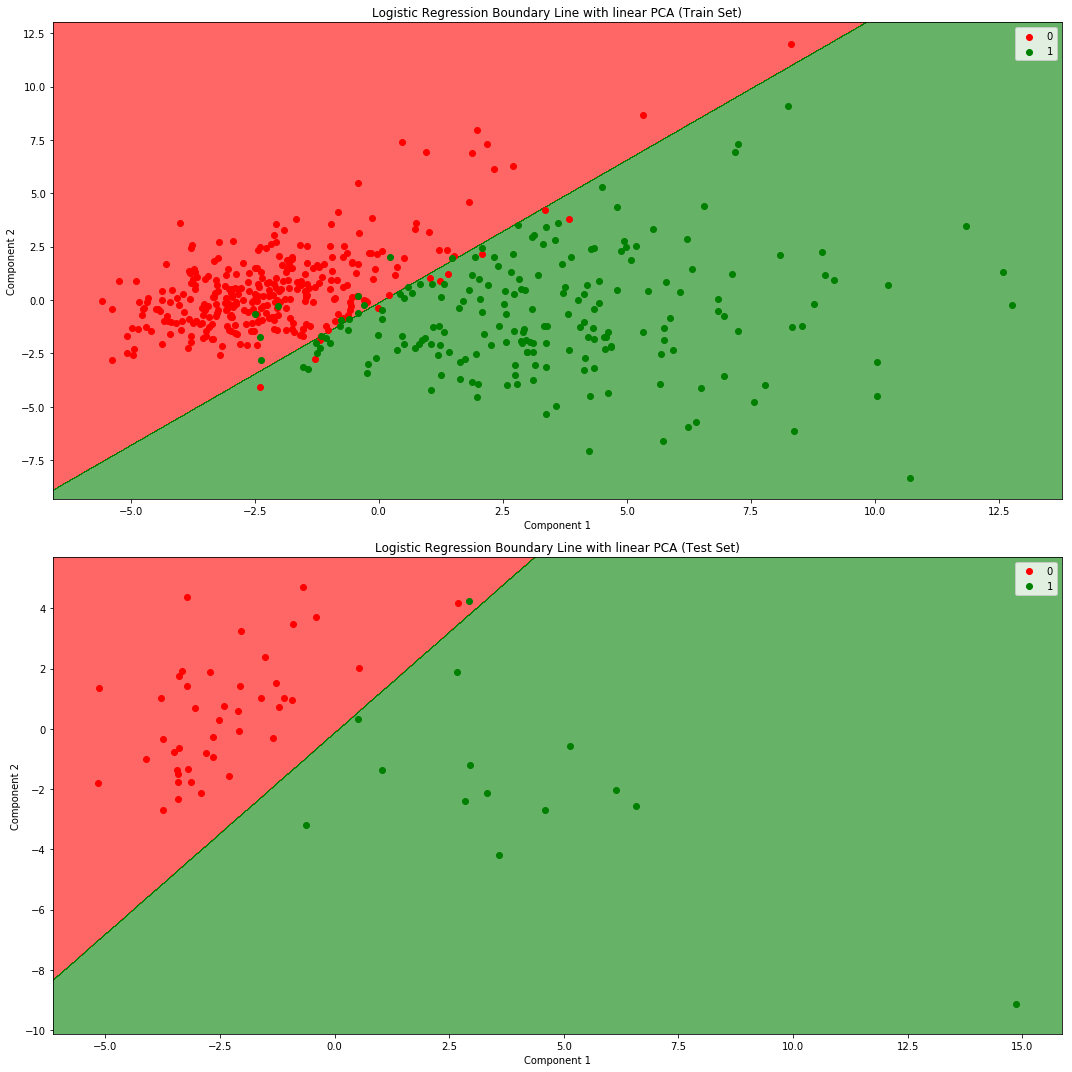

In [12]:
BoundaryLine('linear', LogisticRegression(), "Logistic Regression")

[[42  1]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        43
          1       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        57



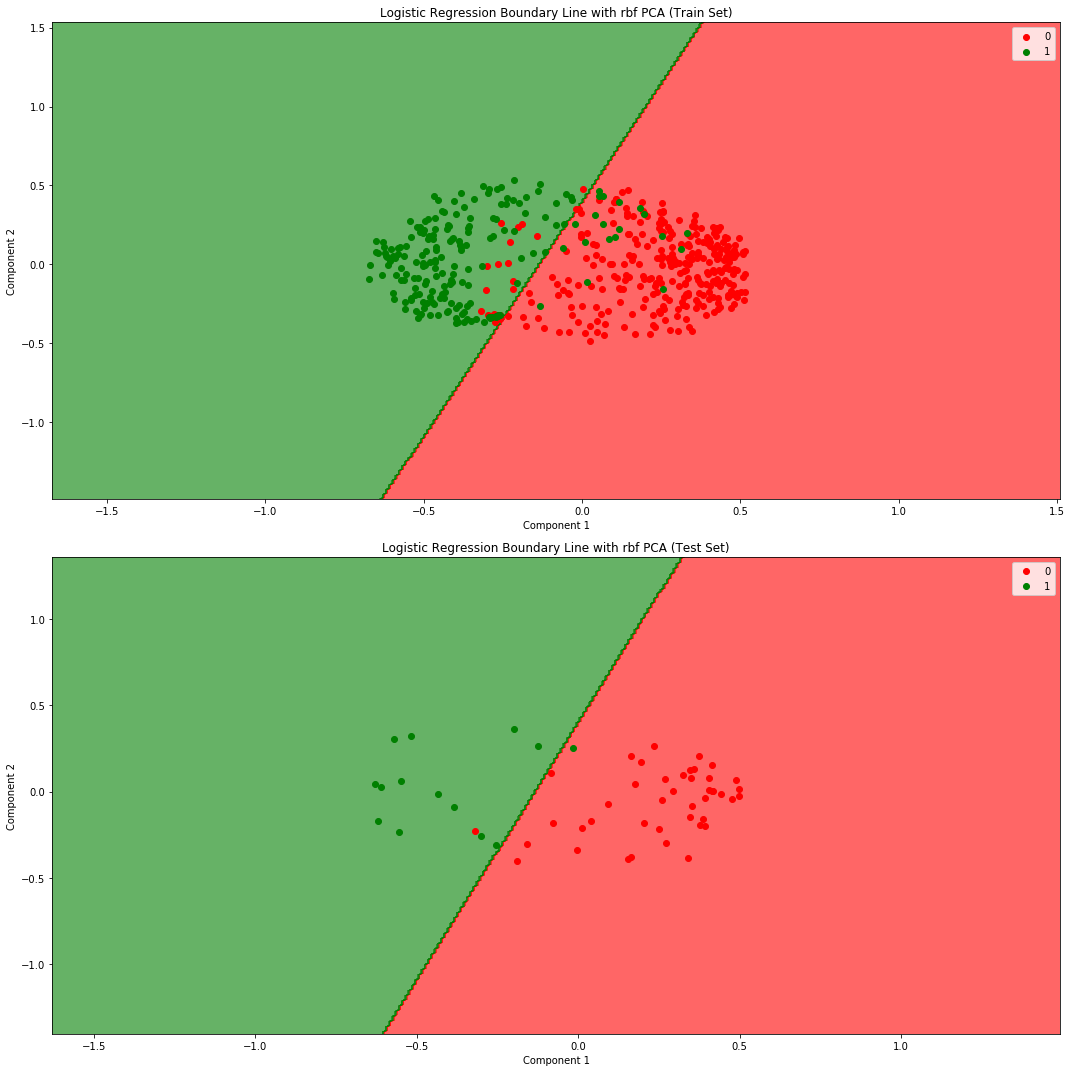

In [13]:
BoundaryLine('rbf', LogisticRegression(), "Logistic Regression")

[[43  0]
 [ 2 12]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        43
          1       1.00      0.86      0.92        14

avg / total       0.97      0.96      0.96        57



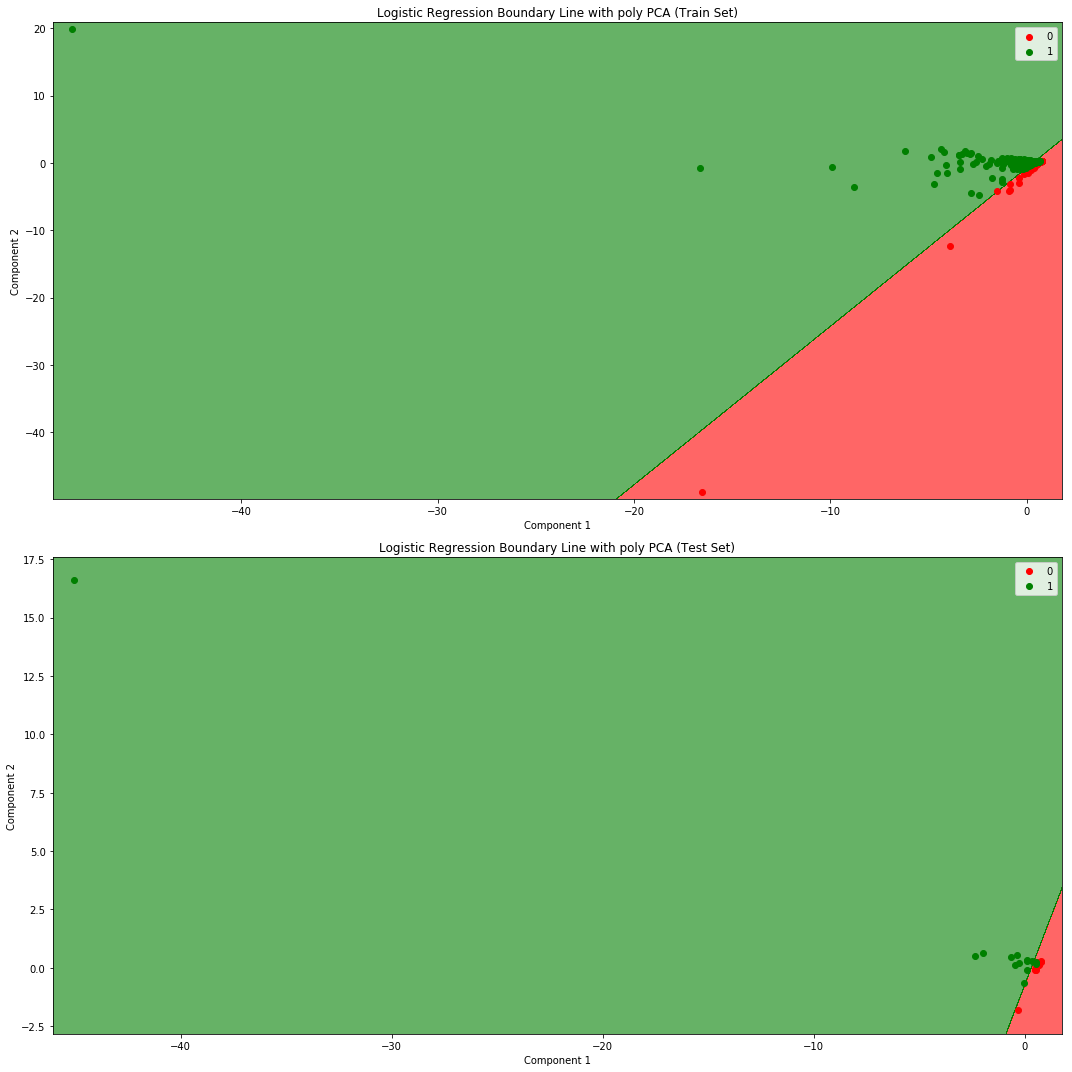

In [14]:
BoundaryLine('poly', LogisticRegression(), "Logistic Regression")

[[43  0]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        43
          1       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        57



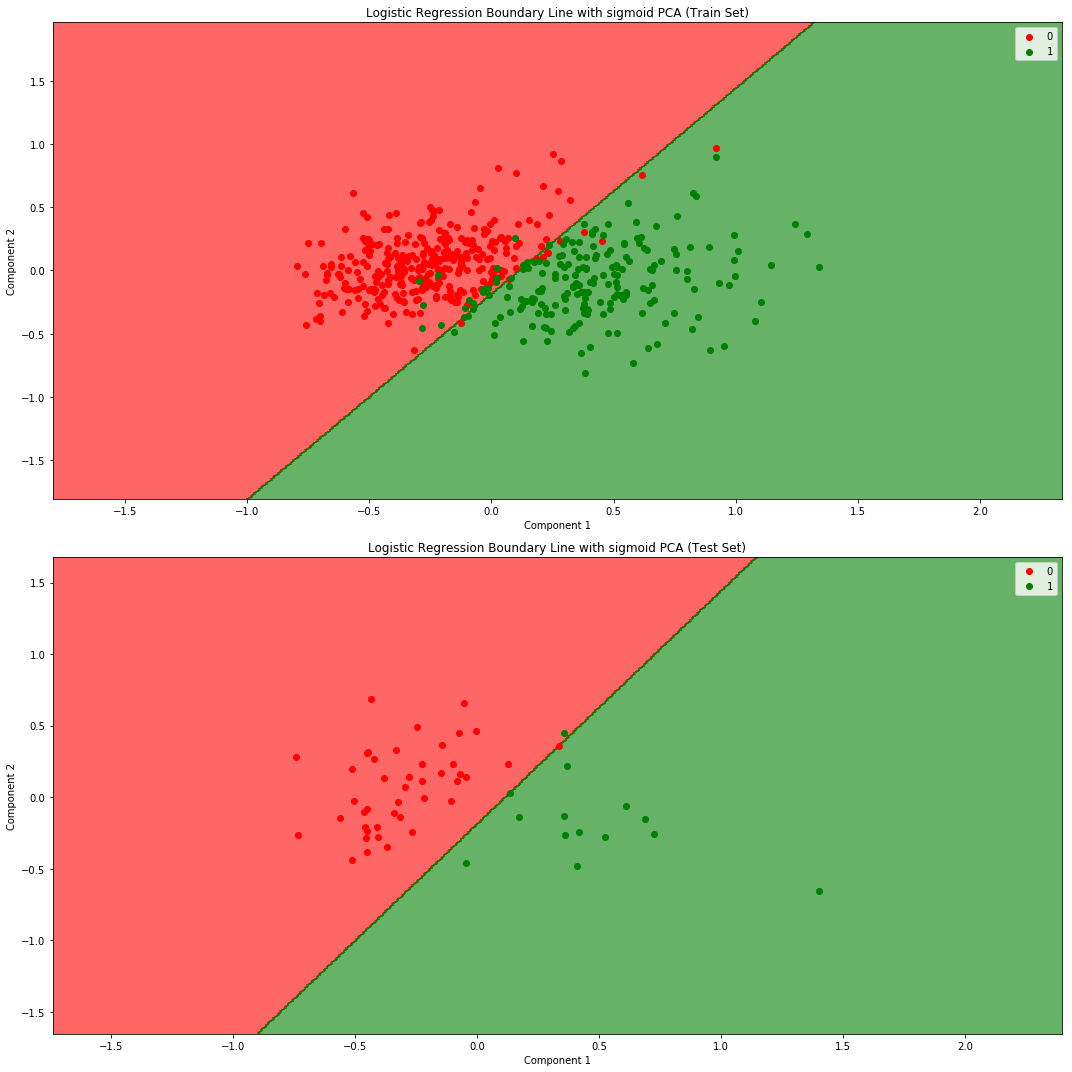

In [15]:
BoundaryLine('sigmoid', LogisticRegression(), "Logistic Regression")

[[42  1]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        43
          1       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        57



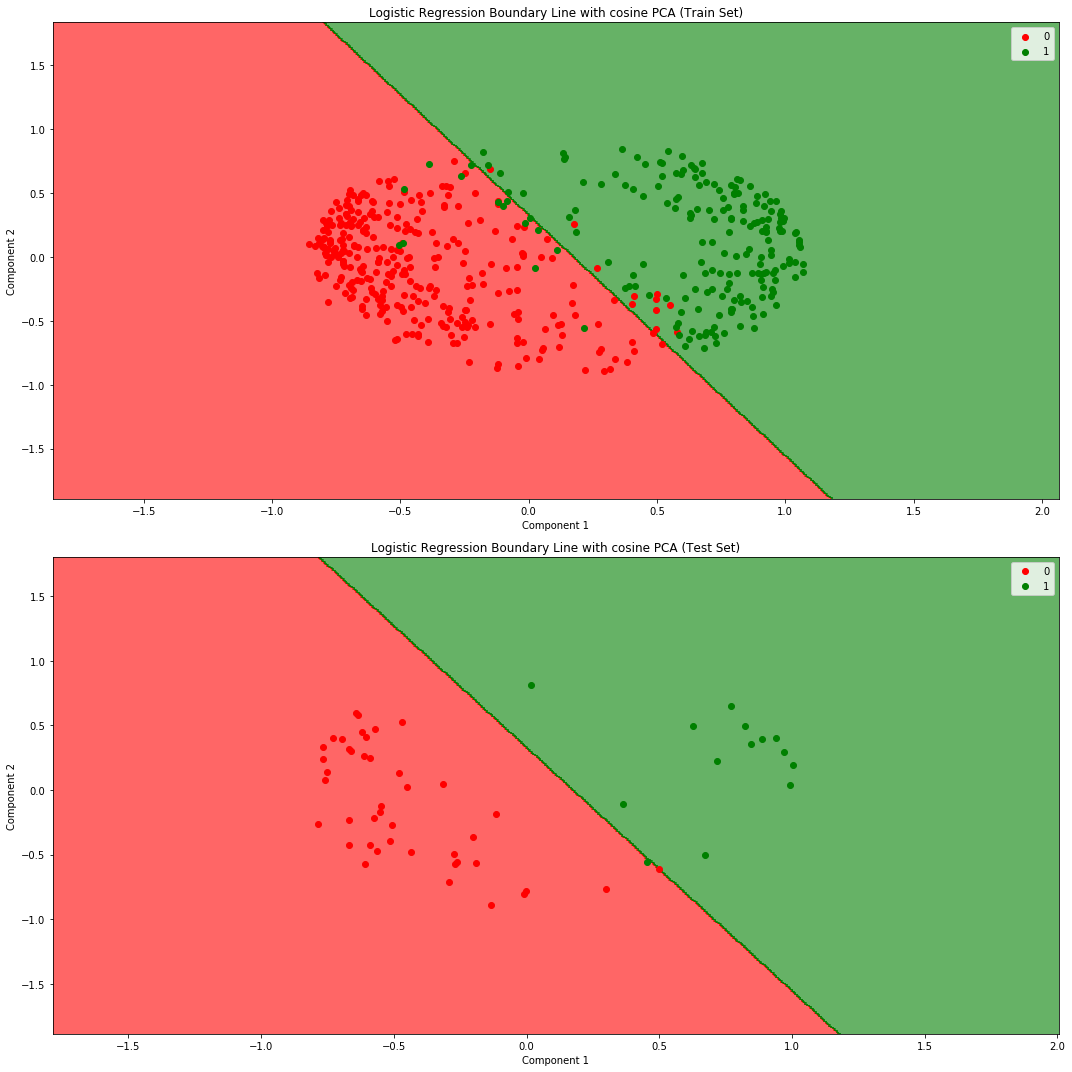

In [16]:
BoundaryLine('cosine', LogisticRegression(), "Logistic Regression")

In [17]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

[[42  1]
 [ 2 12]]
             precision    recall  f1-score   support

          0       0.95      0.98      0.97        43
          1       0.92      0.86      0.89        14

avg / total       0.95      0.95      0.95        57



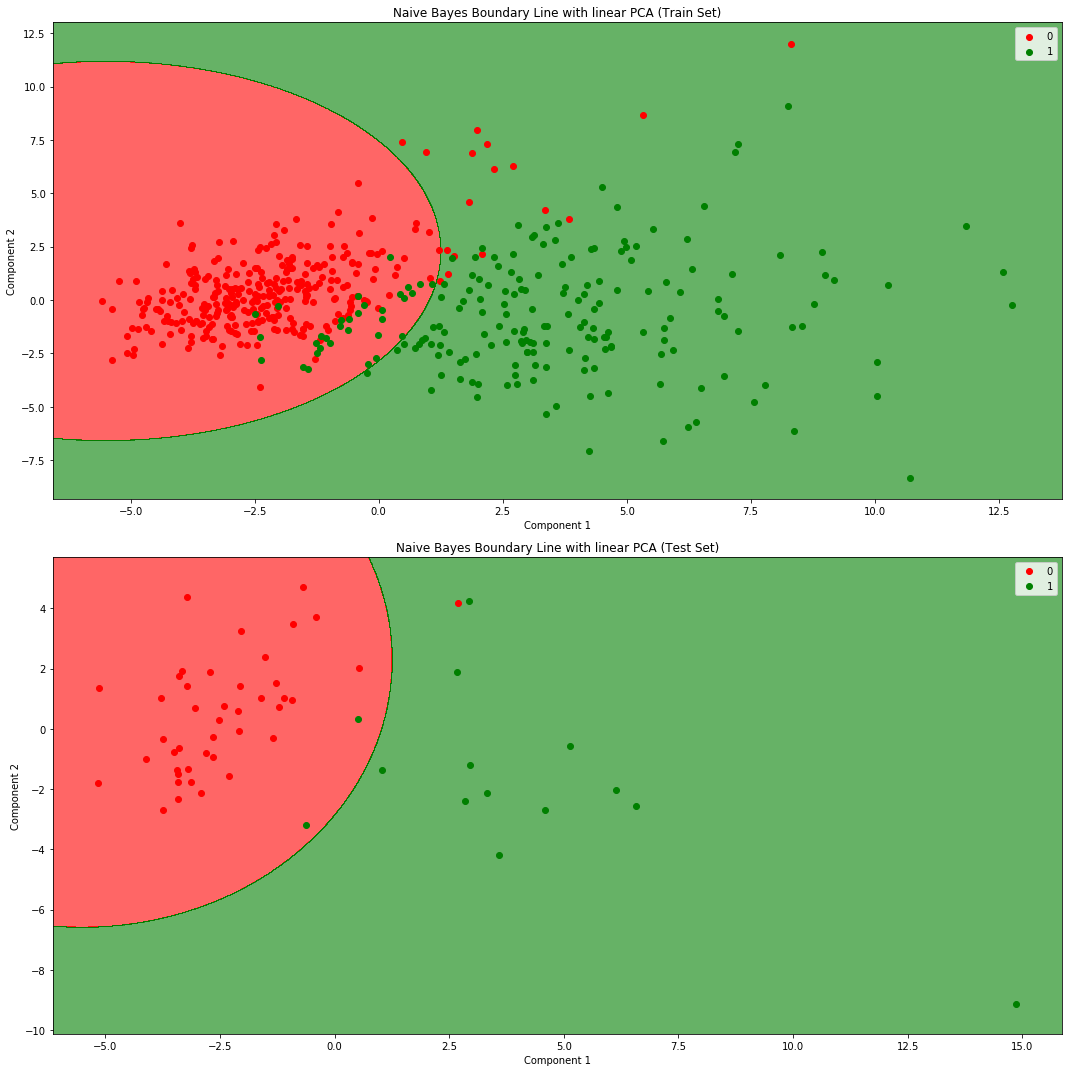

In [18]:
BoundaryLine('linear', GaussianNB(), "Naive Bayes")

[[40  3]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      0.93      0.95        43
          1       0.81      0.93      0.87        14

avg / total       0.94      0.93      0.93        57



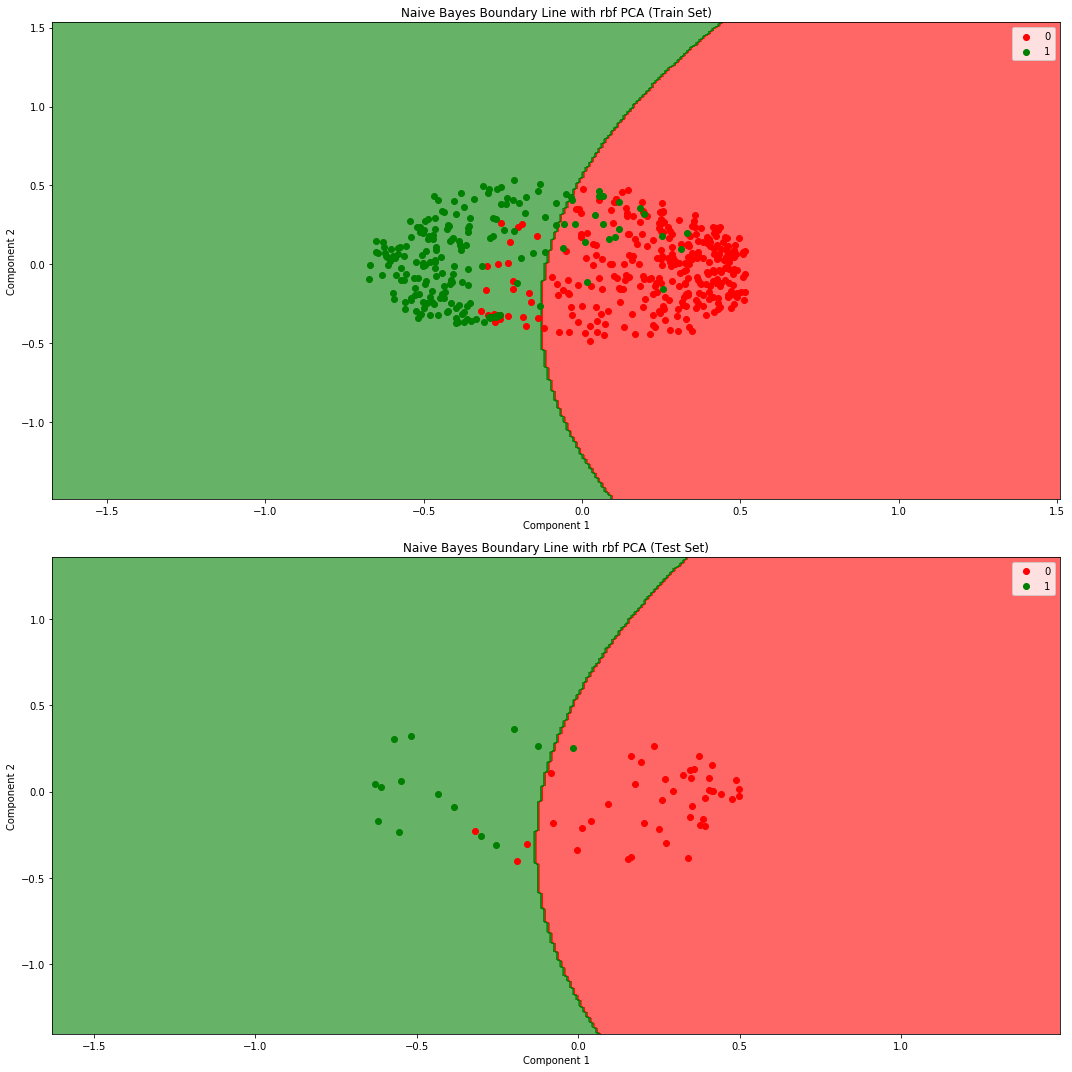

In [19]:
BoundaryLine('rbf', GaussianNB(), "Naive Bayes")

[[43  0]
 [11  3]]
             precision    recall  f1-score   support

          0       0.80      1.00      0.89        43
          1       1.00      0.21      0.35        14

avg / total       0.85      0.81      0.76        57



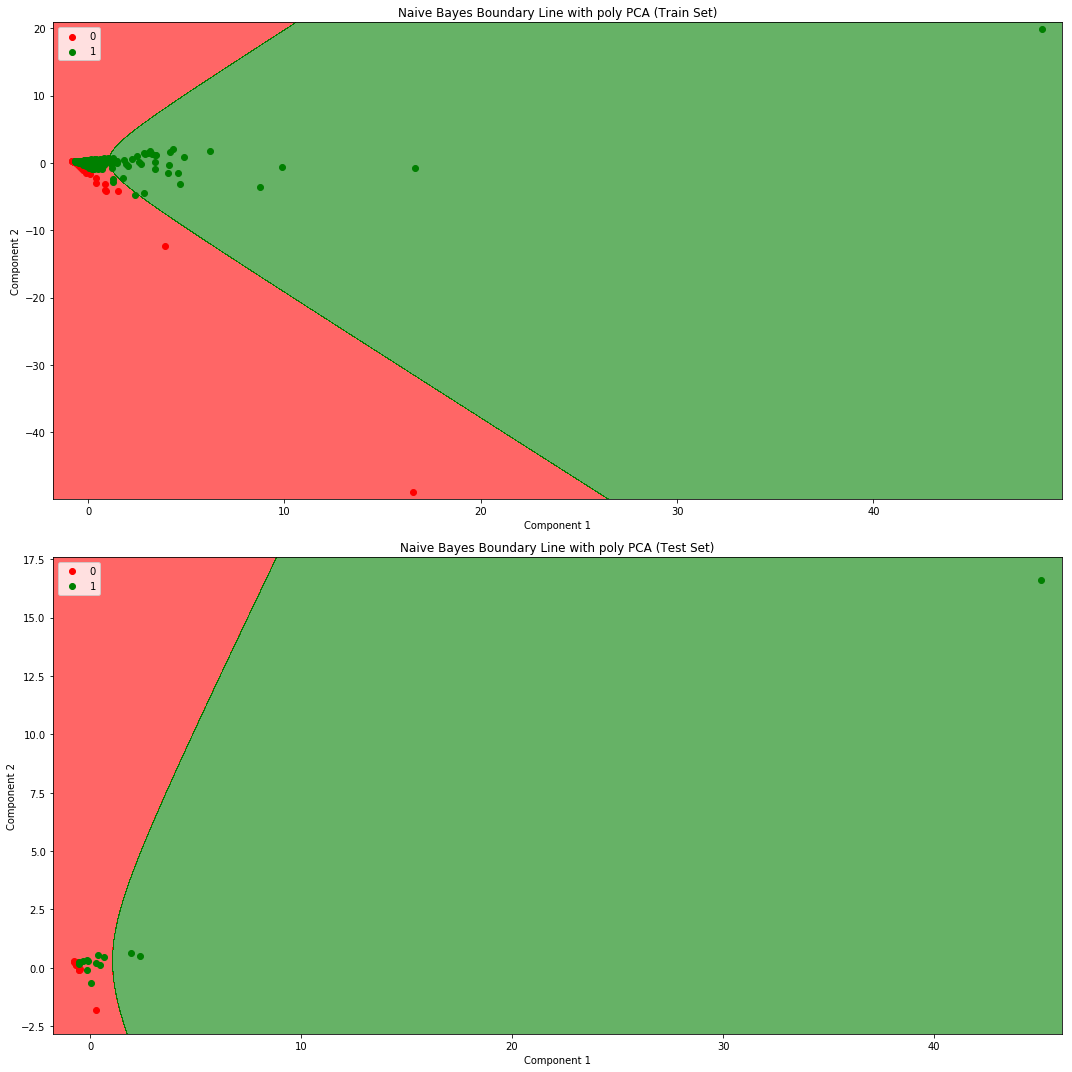

In [20]:
BoundaryLine('poly', GaussianNB(), "Naive Bayes")

[[42  1]
 [ 2 12]]
             precision    recall  f1-score   support

          0       0.95      0.98      0.97        43
          1       0.92      0.86      0.89        14

avg / total       0.95      0.95      0.95        57



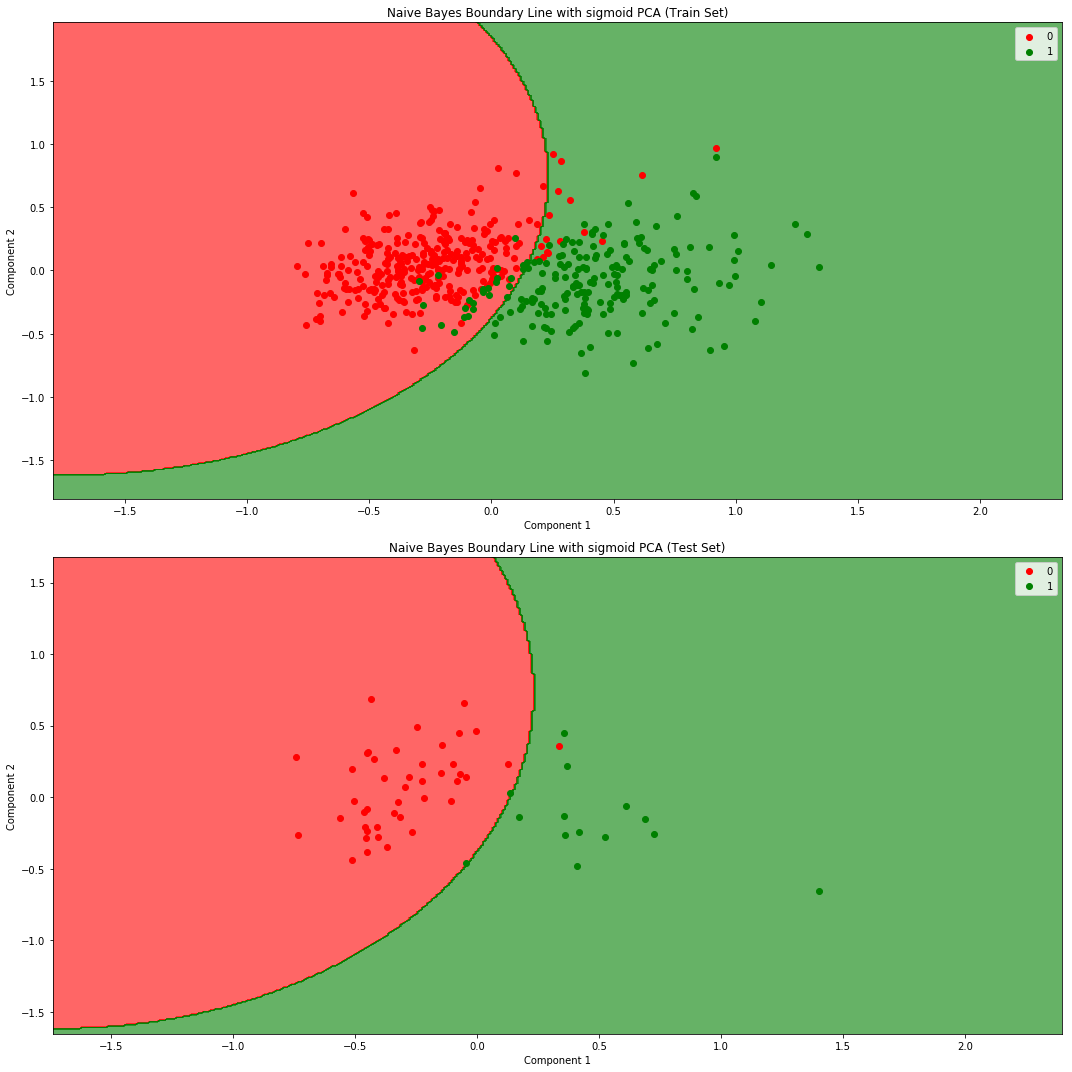

In [21]:
BoundaryLine('sigmoid', GaussianNB(), "Naive Bayes")

[[41  2]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      0.95      0.96        43
          1       0.87      0.93      0.90        14

avg / total       0.95      0.95      0.95        57



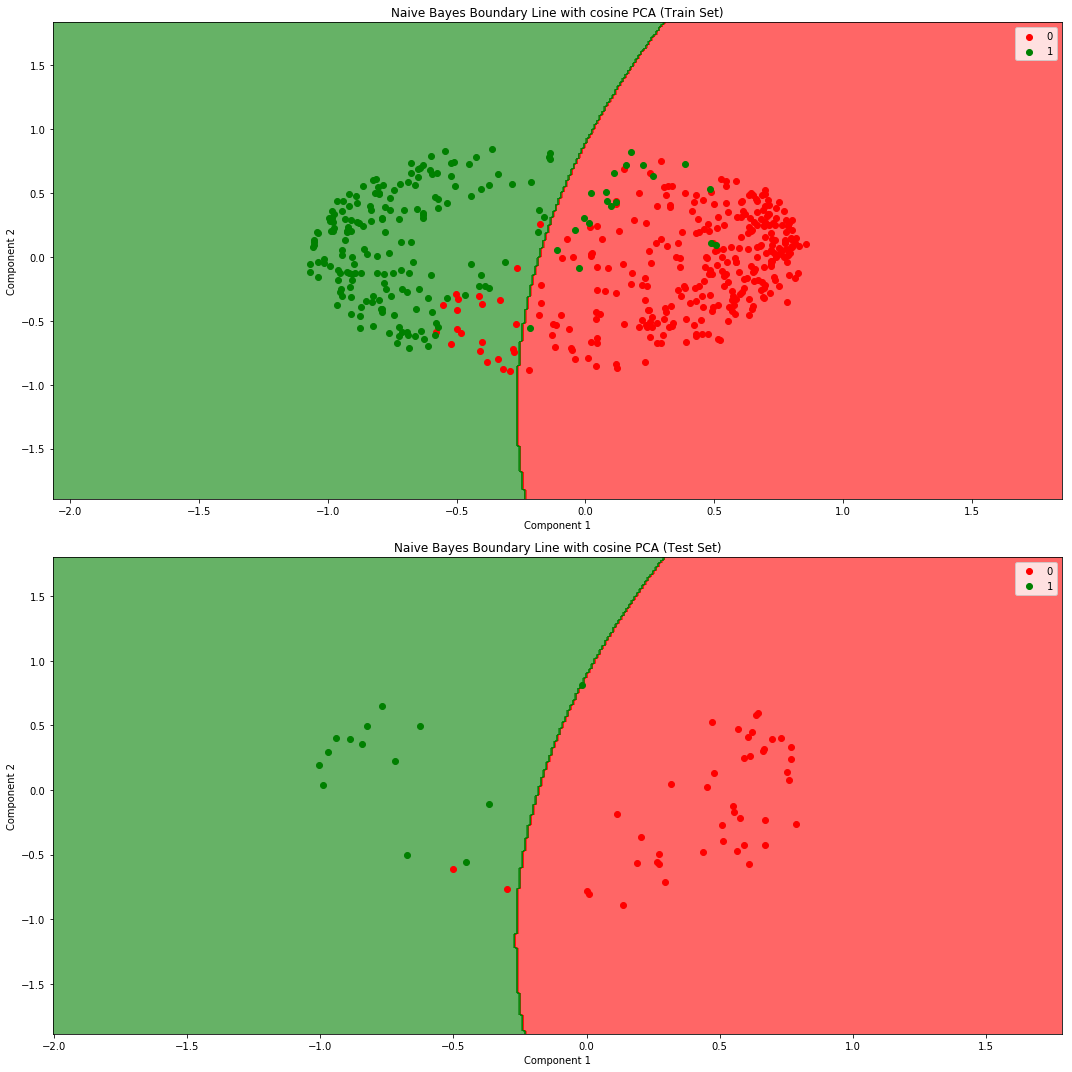

In [22]:
BoundaryLine('cosine', GaussianNB(), "Naive Bayes")

In [23]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

[[42  1]
 [ 0 14]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       0.93      1.00      0.97        14

avg / total       0.98      0.98      0.98        57



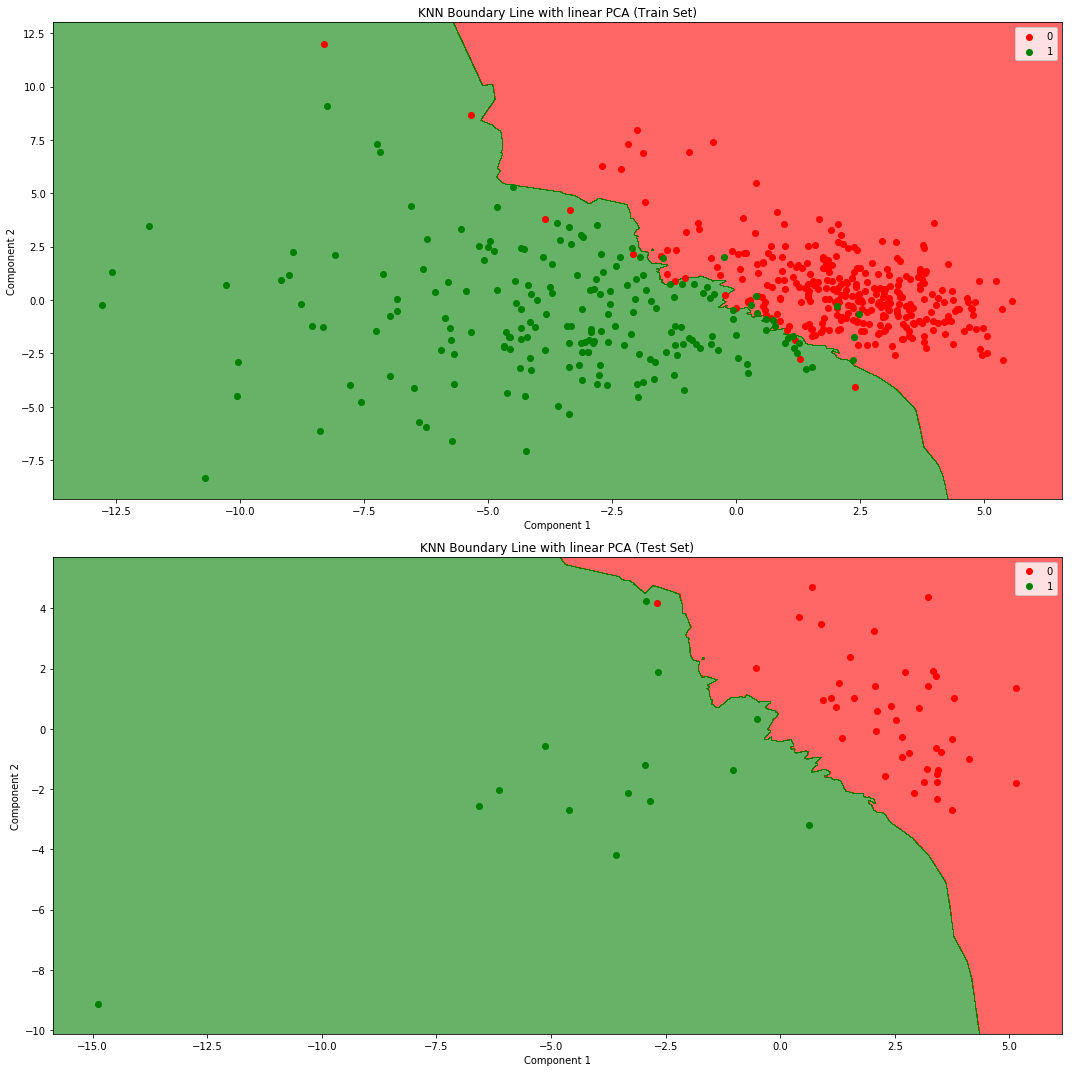

In [24]:
BoundaryLine('linear', KNeighborsClassifier(), "KNN")

[[41  2]
 [ 2 12]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95        43
          1       0.86      0.86      0.86        14

avg / total       0.93      0.93      0.93        57



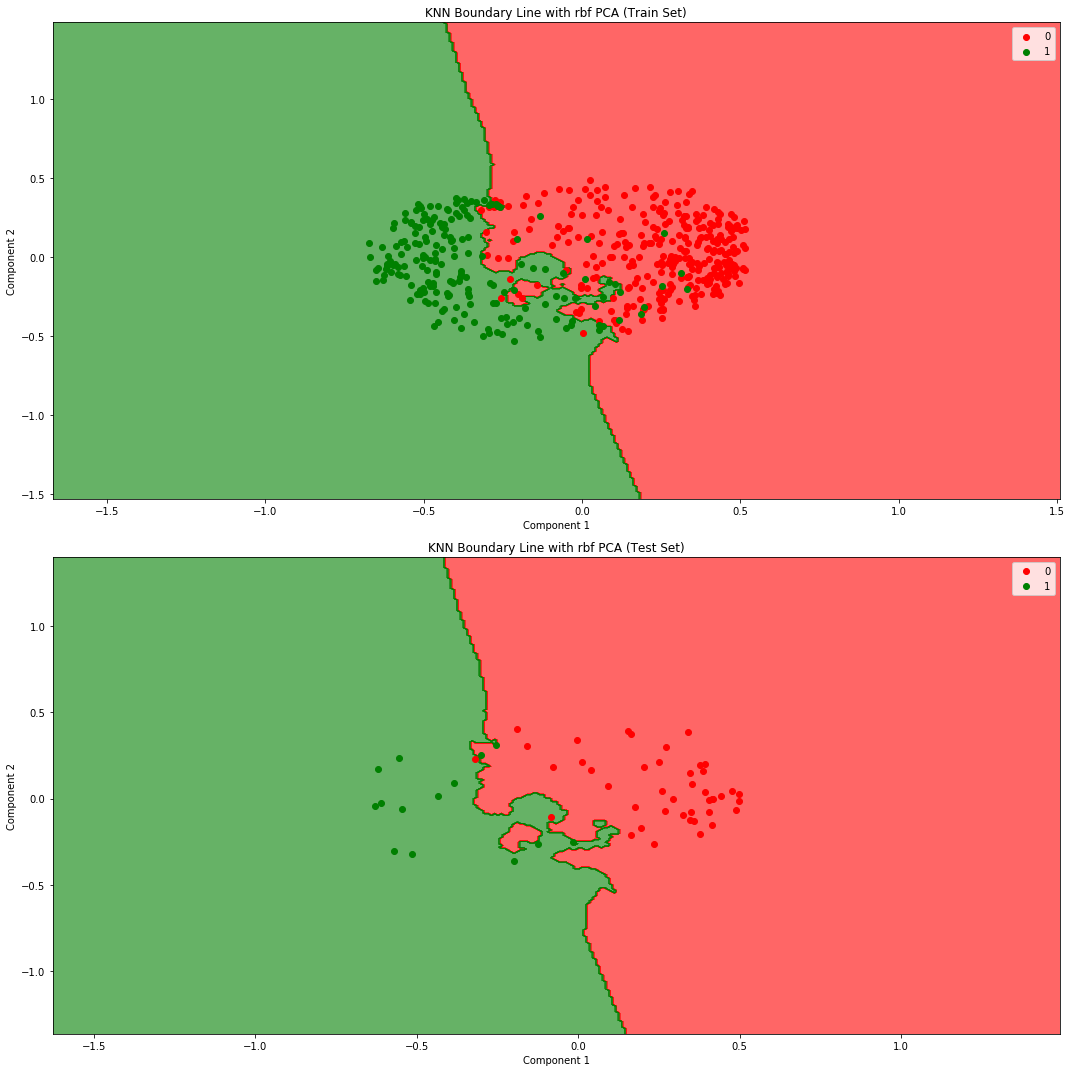

In [25]:
BoundaryLine('rbf', KNeighborsClassifier(), "KNN")

[[43  0]
 [ 0 14]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        57



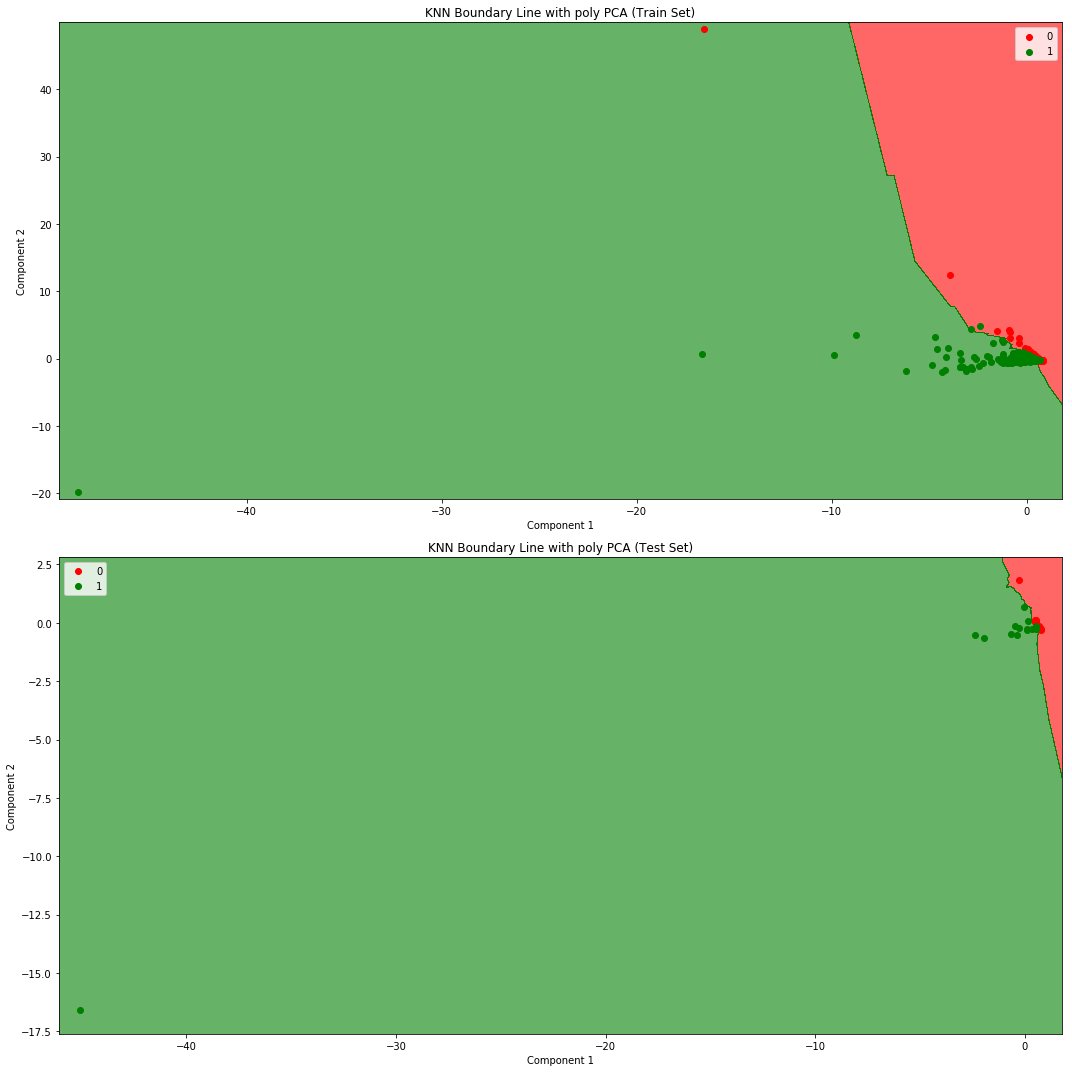

In [26]:
BoundaryLine('poly', KNeighborsClassifier(), "KNN")

[[42  1]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        43
          1       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        57



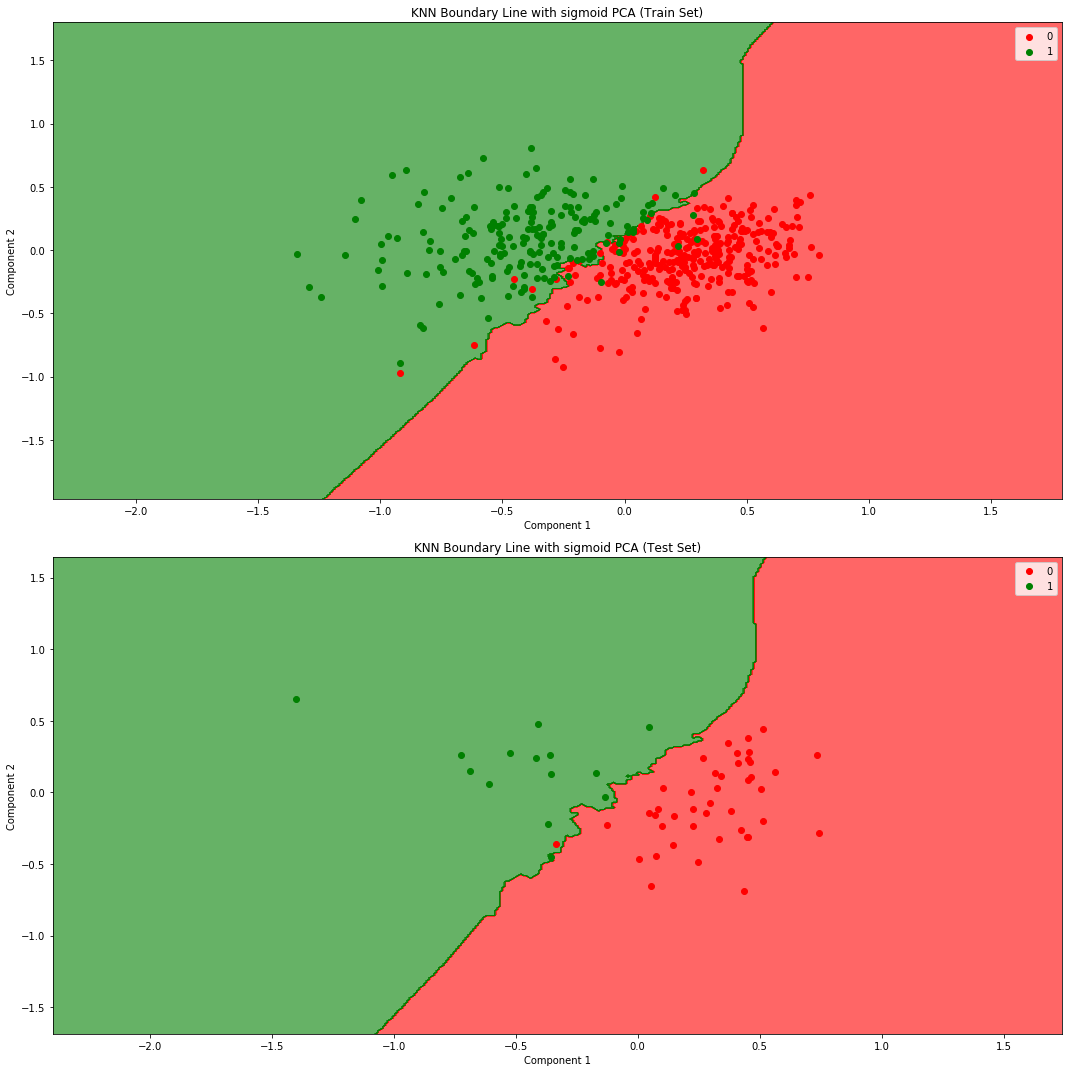

In [27]:
BoundaryLine('sigmoid', KNeighborsClassifier(), "KNN")

[[43  0]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        43
          1       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        57



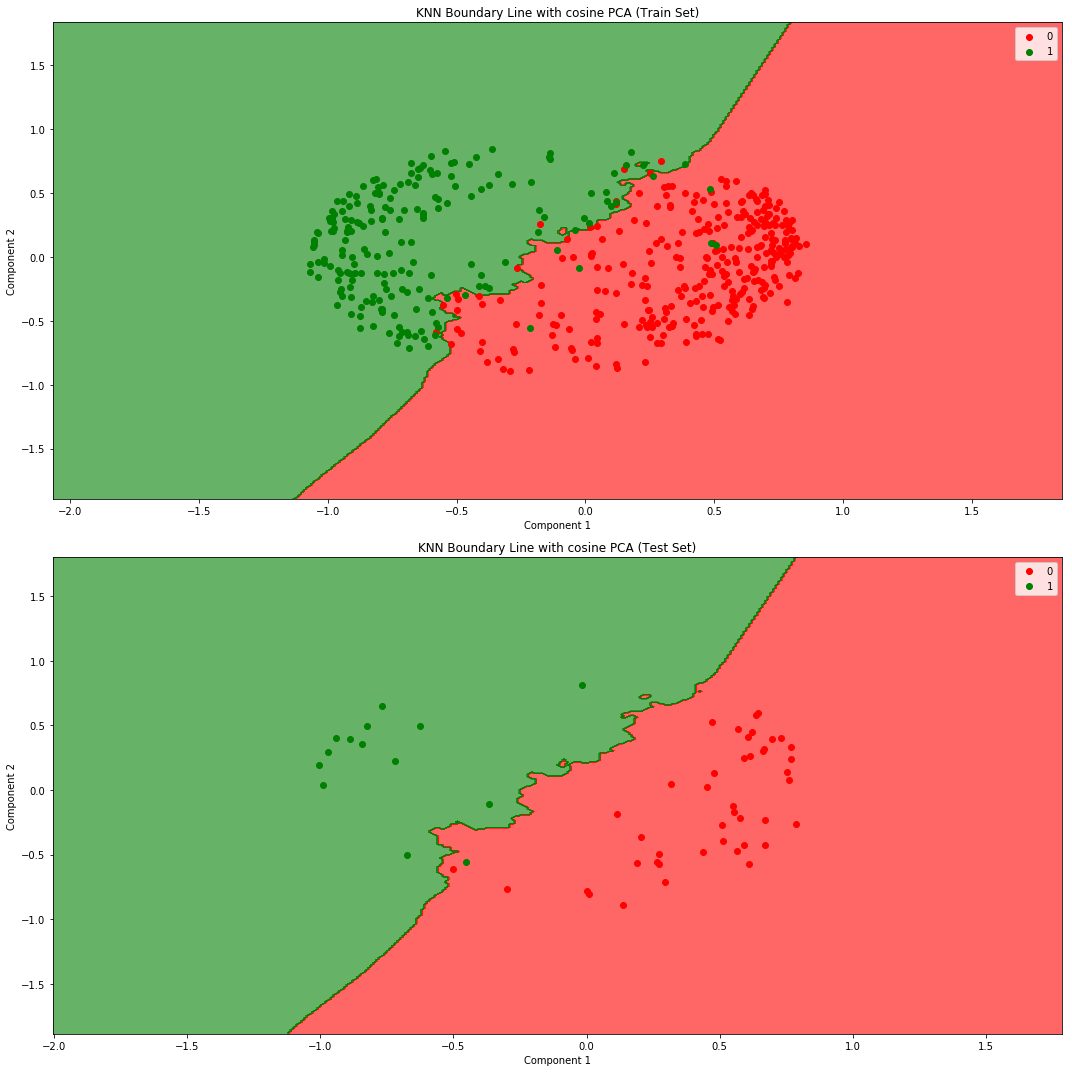

In [28]:
BoundaryLine('cosine', KNeighborsClassifier(), "KNN")

In [29]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

[[43  0]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        43
          1       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        57



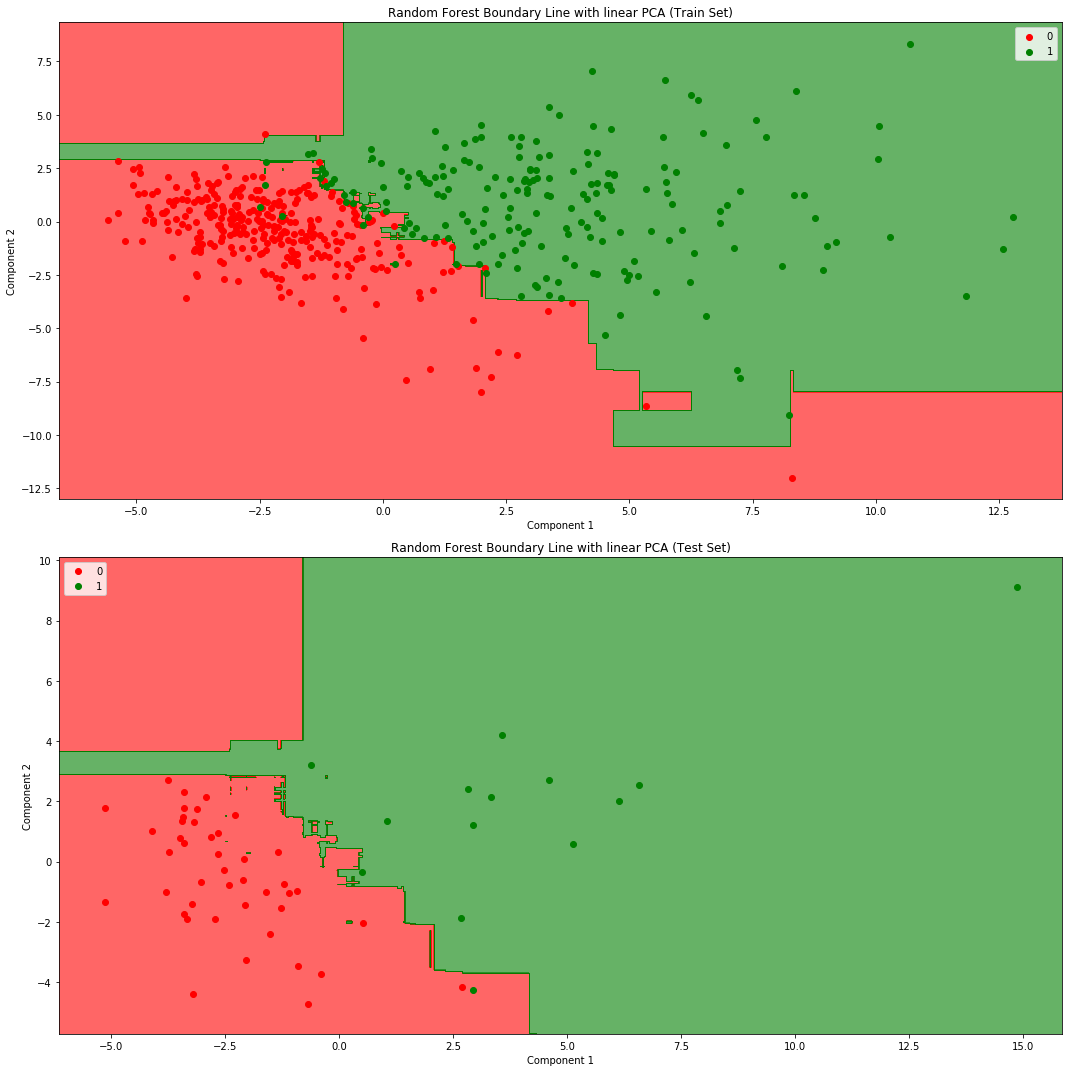

In [30]:
BoundaryLine('linear', RandomForestClassifier(), "Random Forest")

[[42  1]
 [ 3 11]]
             precision    recall  f1-score   support

          0       0.93      0.98      0.95        43
          1       0.92      0.79      0.85        14

avg / total       0.93      0.93      0.93        57



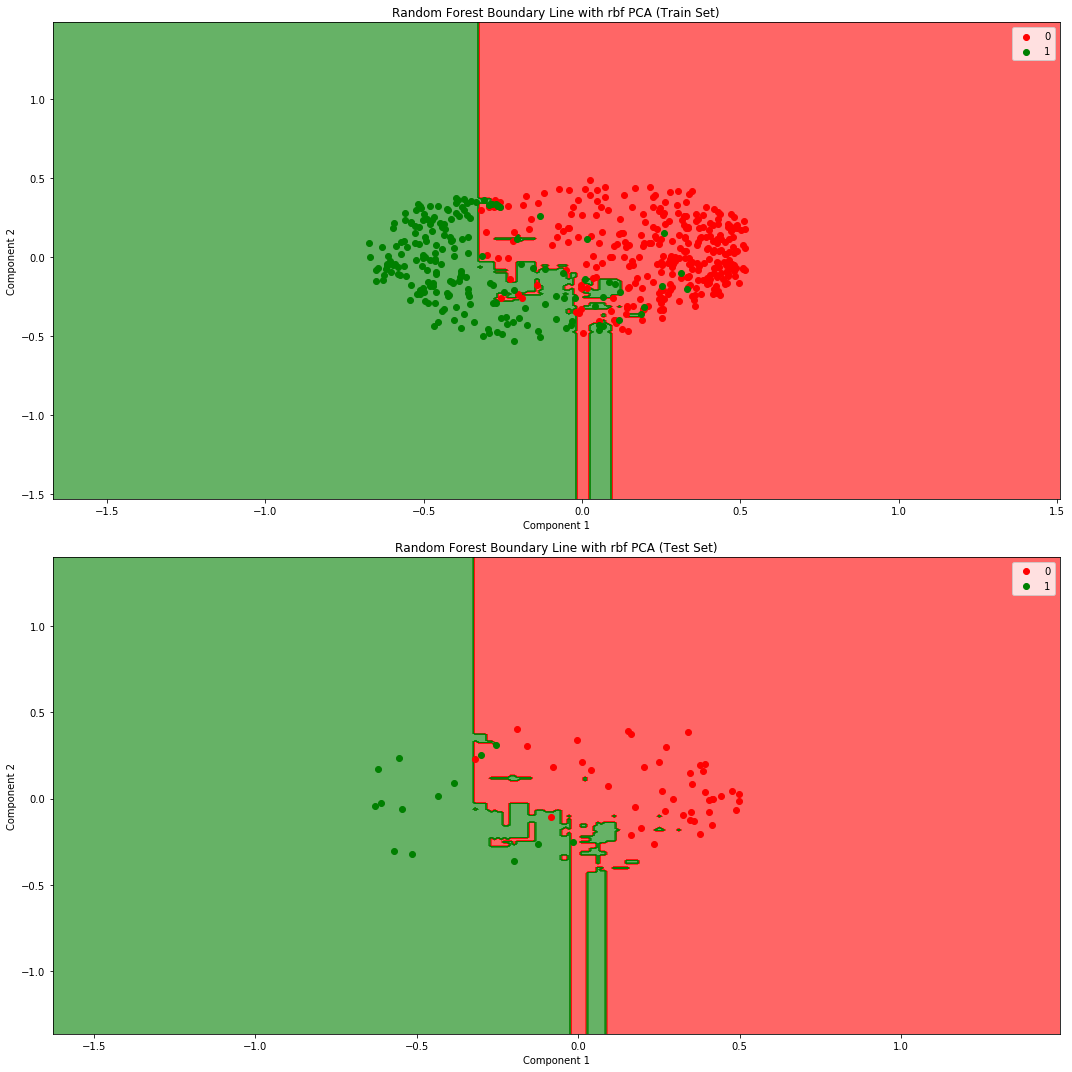

In [31]:
BoundaryLine('rbf', RandomForestClassifier(), "Random Forest")

[[43  0]
 [ 0 14]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        57



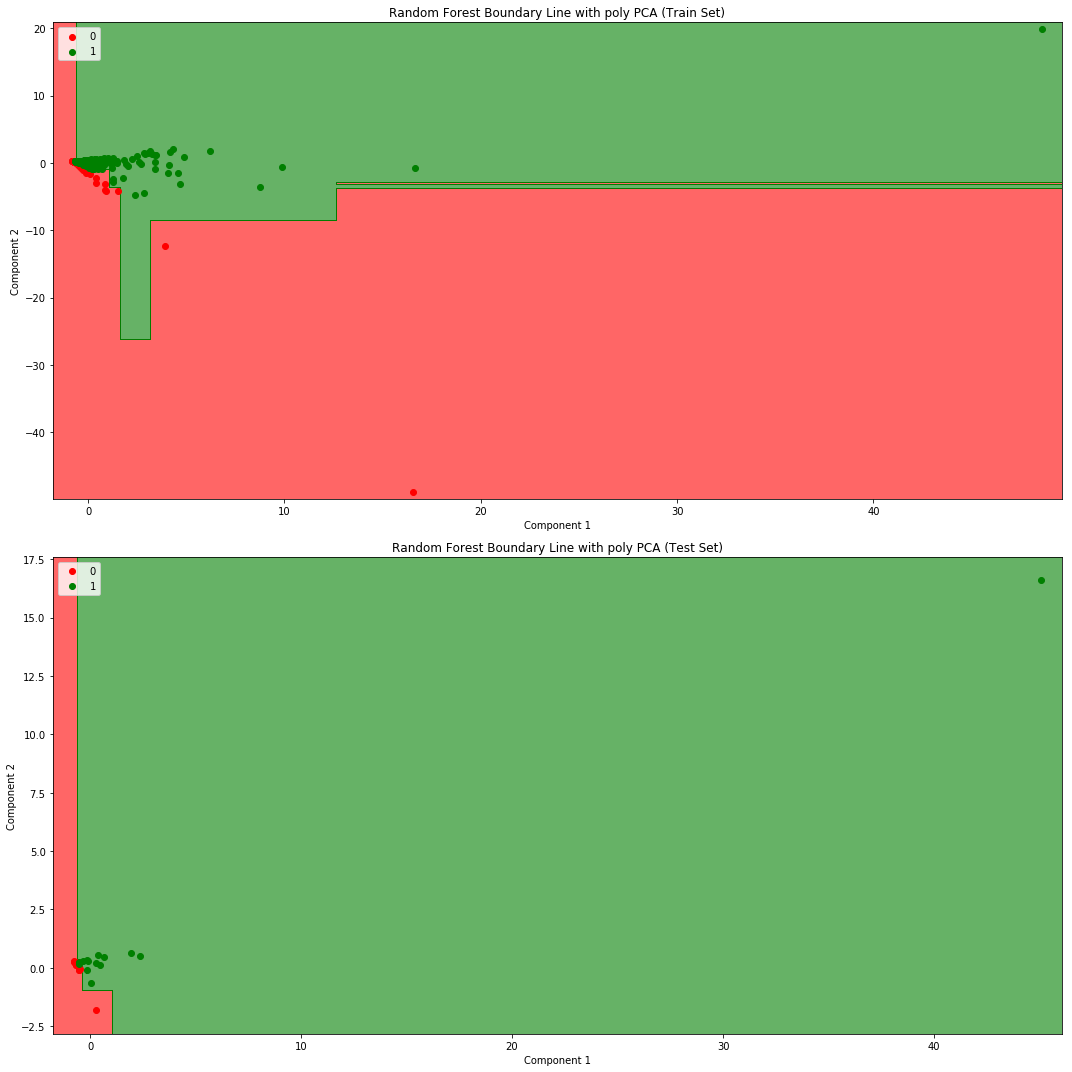

In [32]:
BoundaryLine('poly', RandomForestClassifier(), "Random Forest")

[[42  1]
 [ 0 14]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       0.93      1.00      0.97        14

avg / total       0.98      0.98      0.98        57



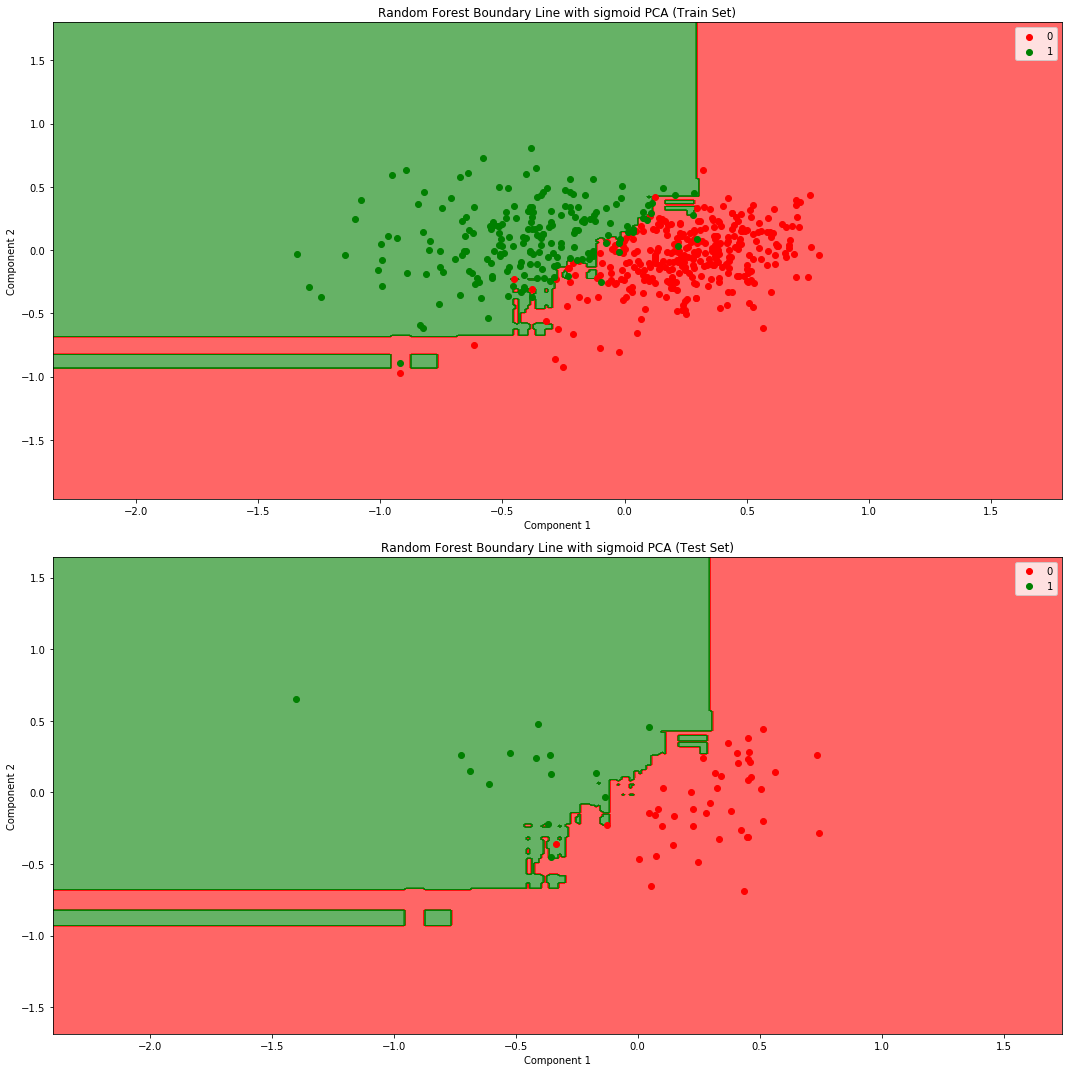

In [33]:
BoundaryLine('sigmoid', RandomForestClassifier(), "Random Forest")

[[43  0]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        43
          1       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        57



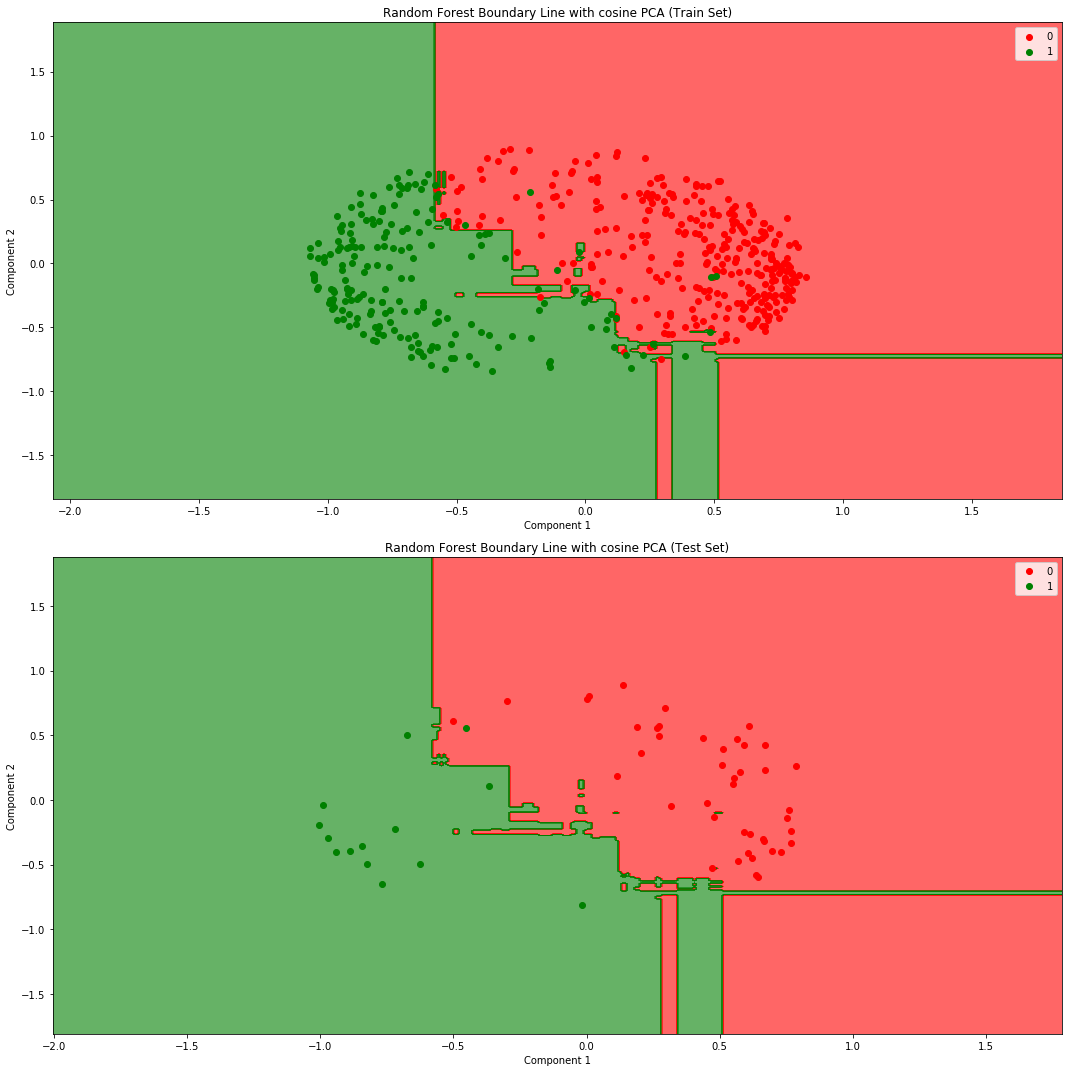

In [34]:
BoundaryLine('cosine', RandomForestClassifier(), "Random Forest")

In [35]:
#Support Vector - linear
from sklearn.svm import SVC

[[43  0]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        43
          1       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        57



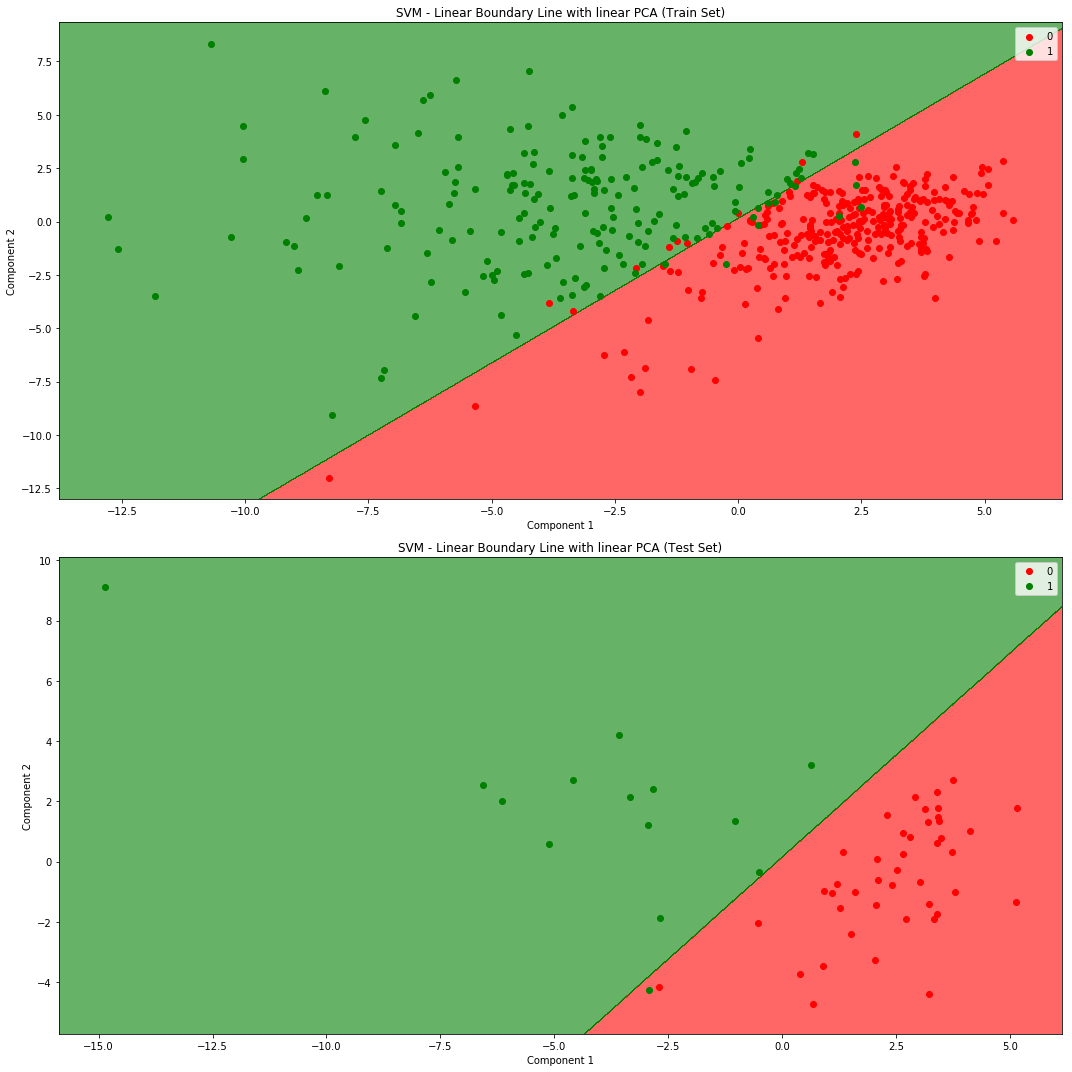

In [36]:
BoundaryLine('linear', SVC(kernel = 'linear'), "SVM - Linear")

[[42  1]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        43
          1       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        57



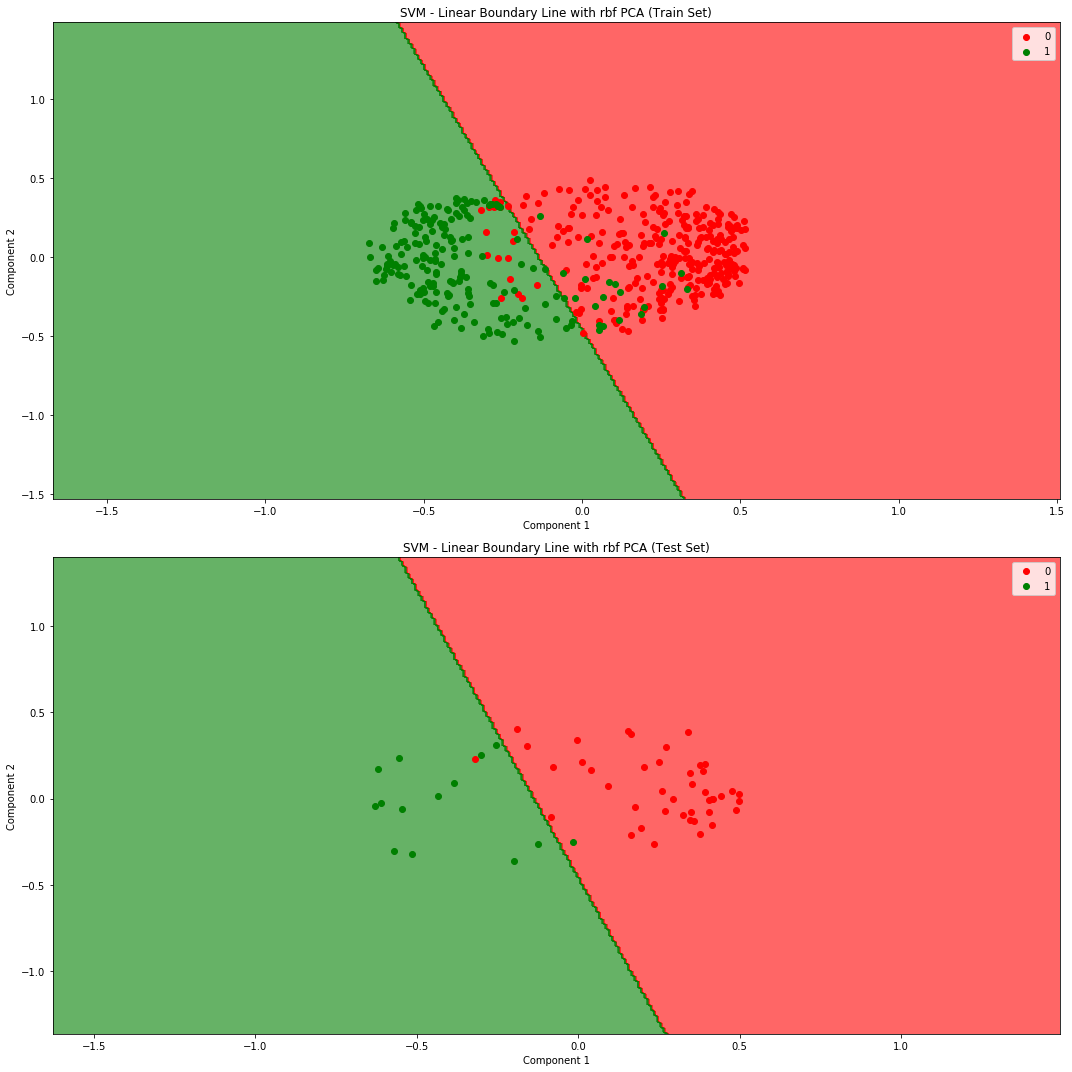

In [37]:
BoundaryLine('rbf', SVC(kernel = 'linear'), "SVM - Linear")

[[43  0]
 [ 2 12]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        43
          1       1.00      0.86      0.92        14

avg / total       0.97      0.96      0.96        57



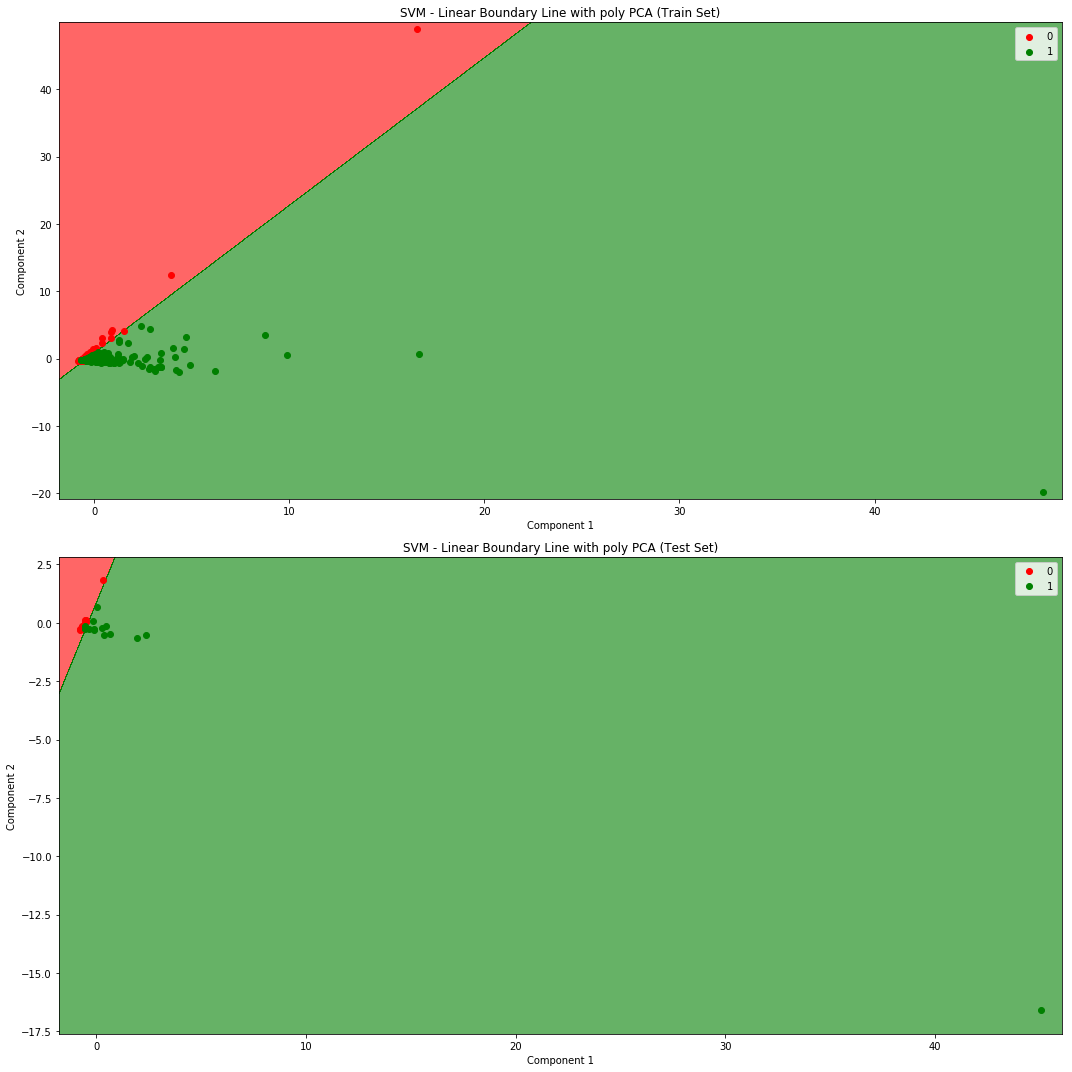

In [38]:
BoundaryLine('poly', SVC(kernel = 'linear'), "SVM - Linear")

[[42  1]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        43
          1       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        57



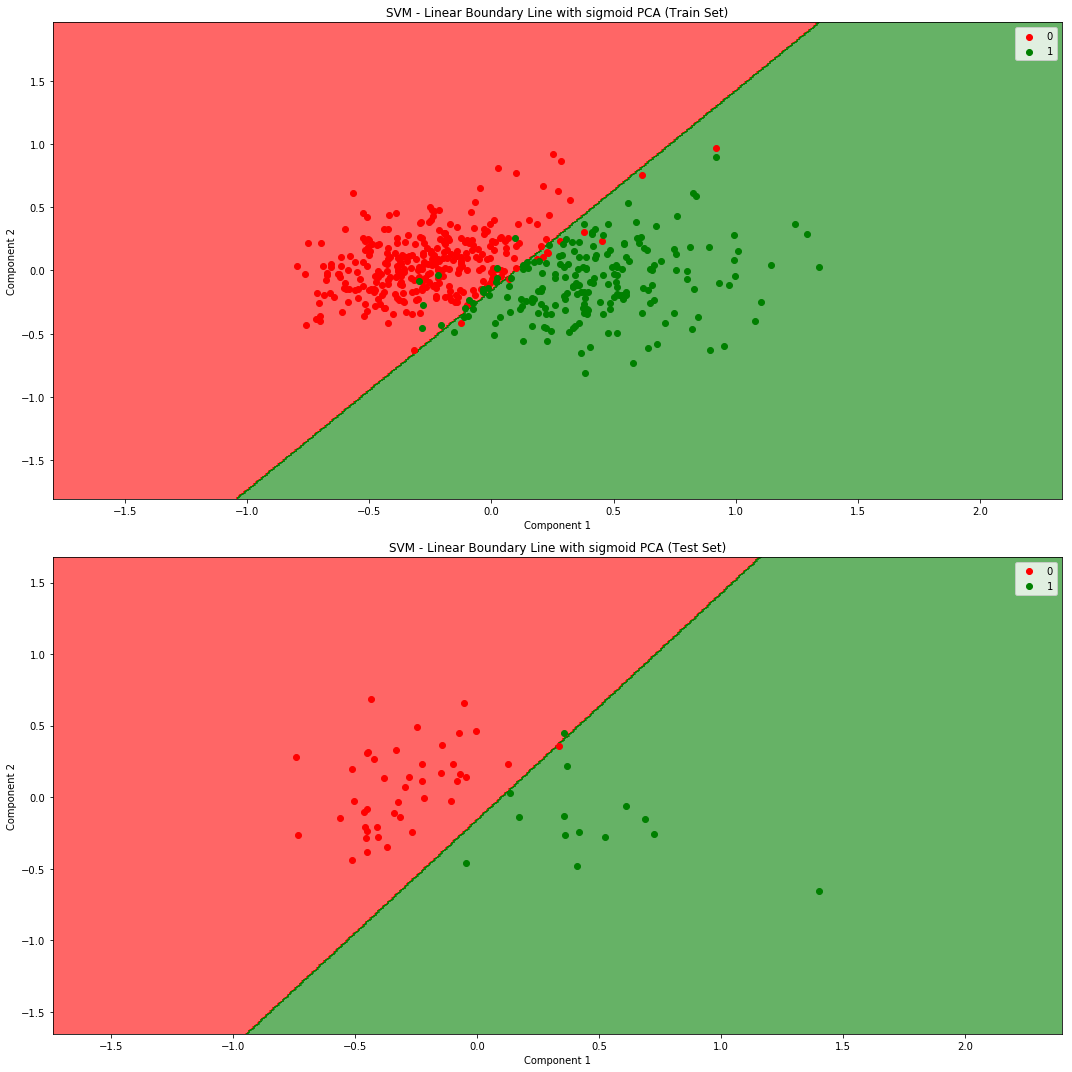

In [39]:
BoundaryLine('sigmoid', SVC(kernel = 'linear'), "SVM - Linear")

[[42  1]
 [ 0 14]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       0.93      1.00      0.97        14

avg / total       0.98      0.98      0.98        57



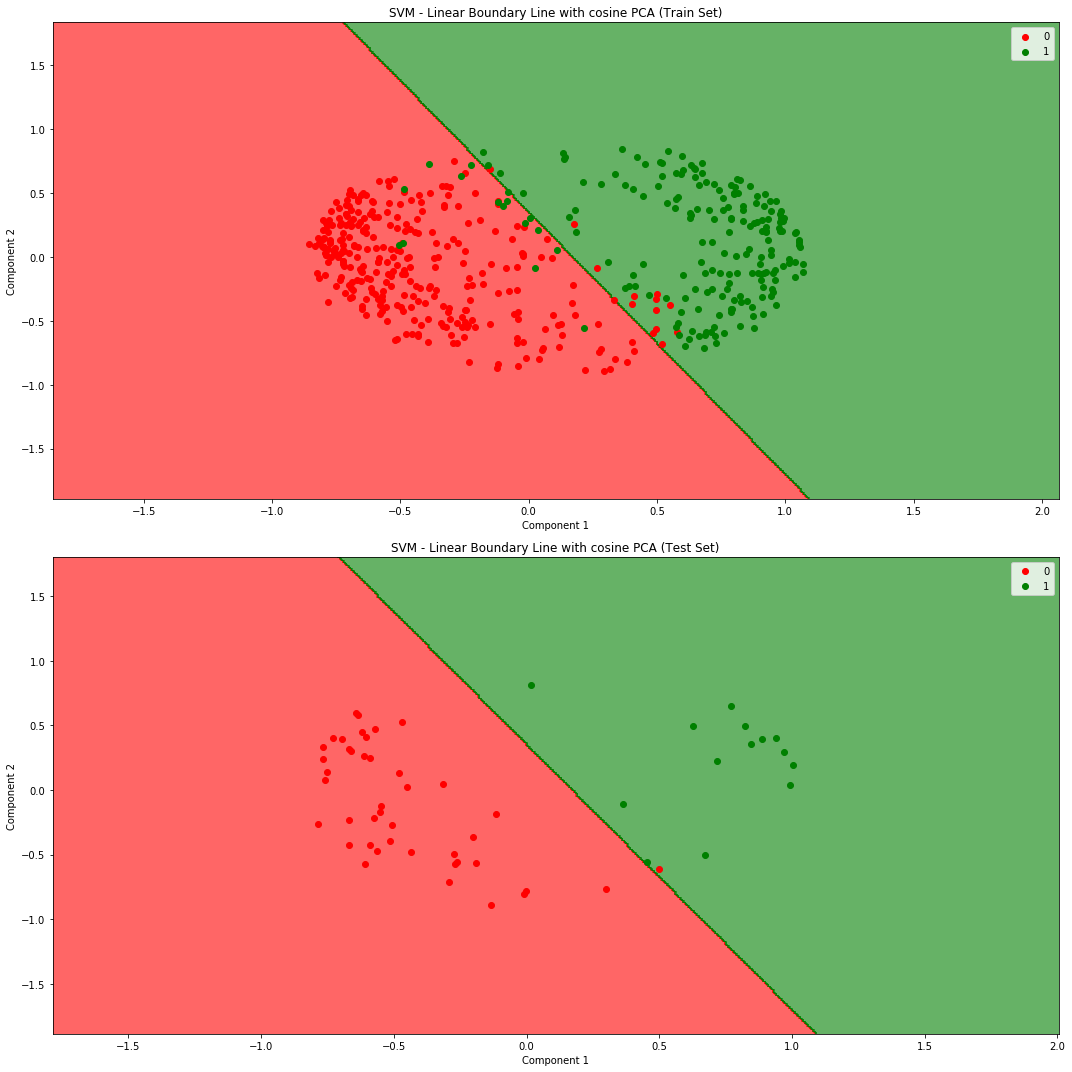

In [40]:
BoundaryLine('cosine', SVC(kernel = 'linear'), "SVM - Linear")

[[43  0]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        43
          1       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        57



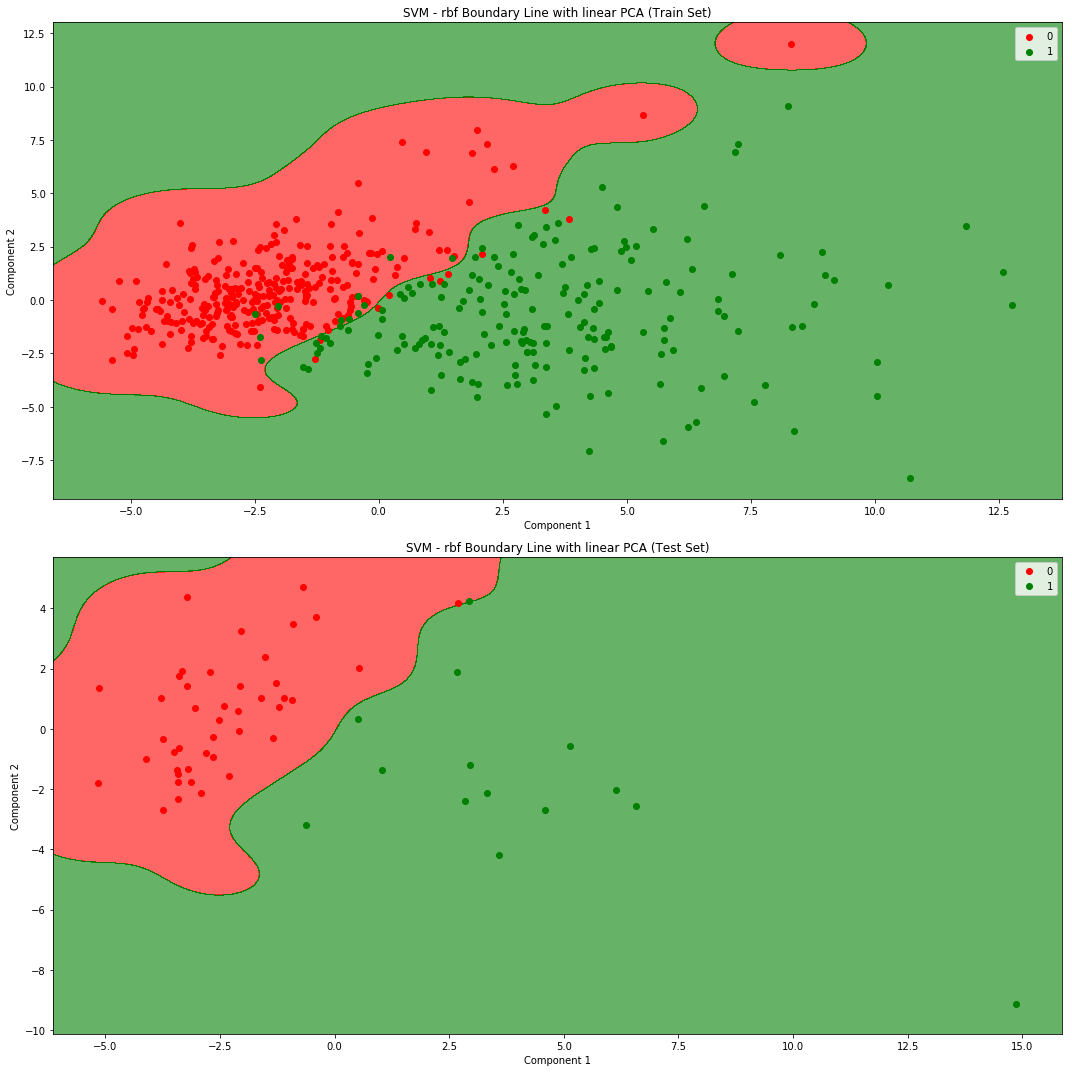

In [41]:
#Support Vector - RBF
BoundaryLine('linear', SVC(kernel = 'rbf'), "SVM - rbf")

[[42  1]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        43
          1       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        57



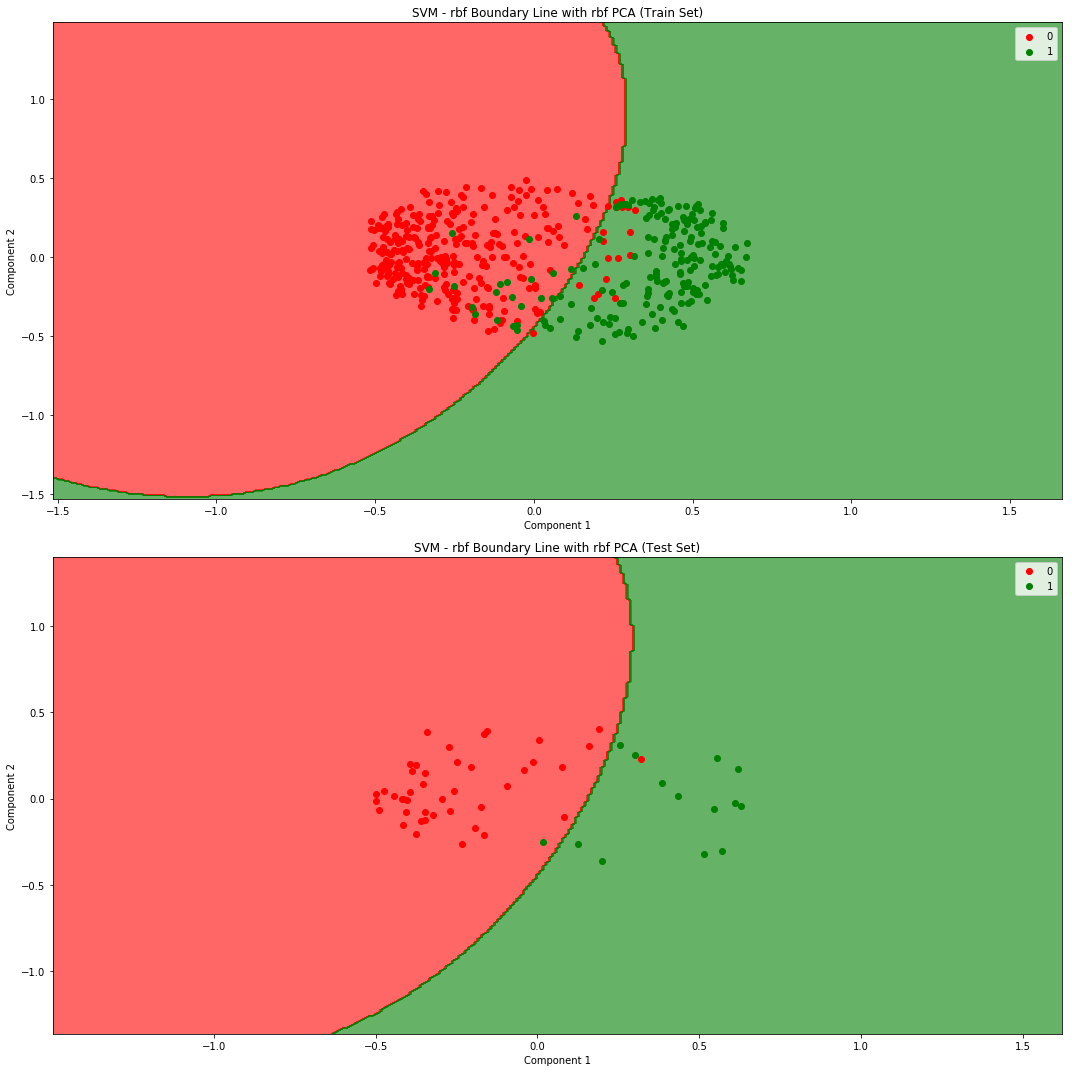

In [42]:
BoundaryLine('rbf', SVC(kernel = 'rbf'), "SVM - rbf")

[[43  0]
 [ 2 12]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        43
          1       1.00      0.86      0.92        14

avg / total       0.97      0.96      0.96        57



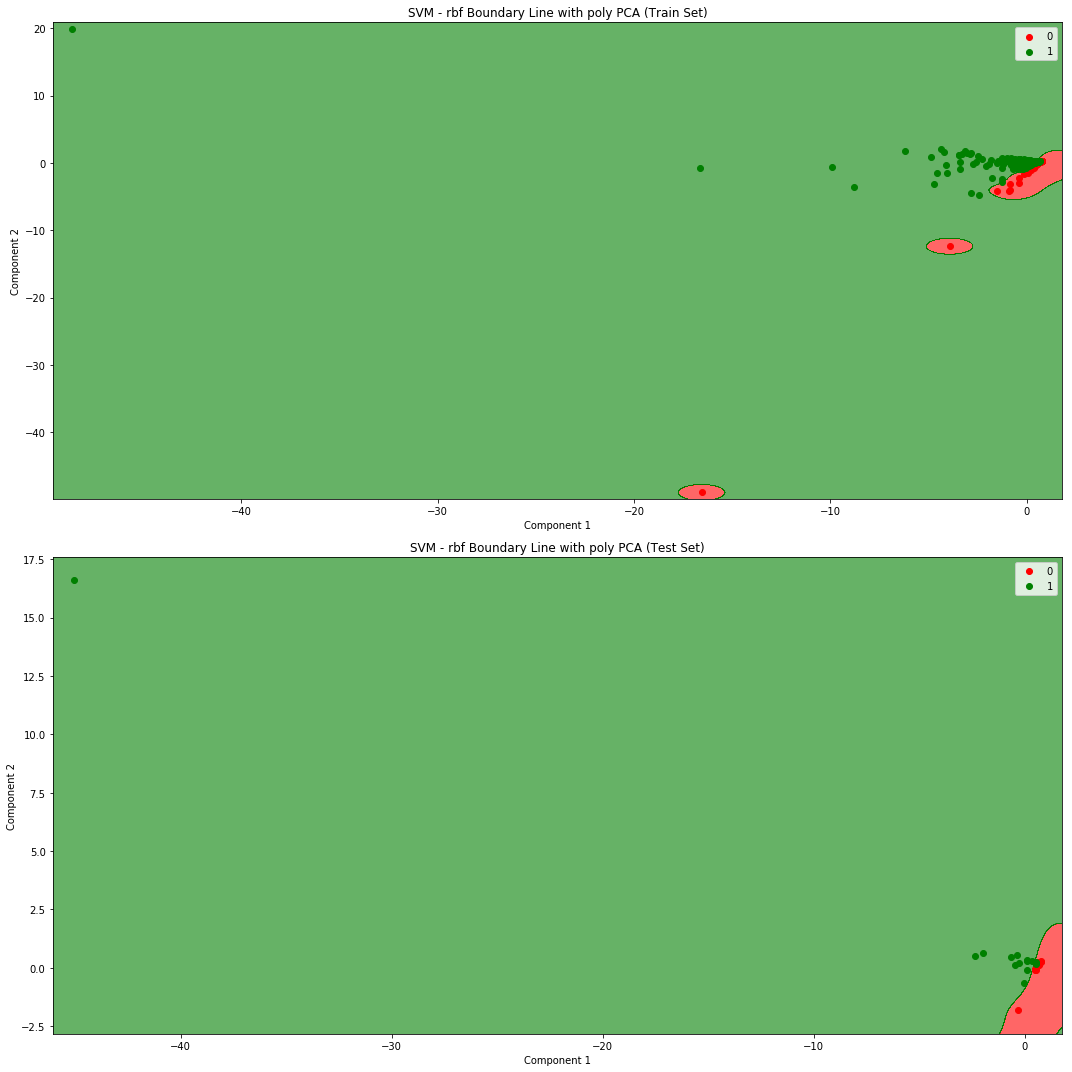

In [43]:
BoundaryLine('poly', SVC(kernel = 'rbf'), "SVM - rbf")

[[42  1]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        43
          1       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        57



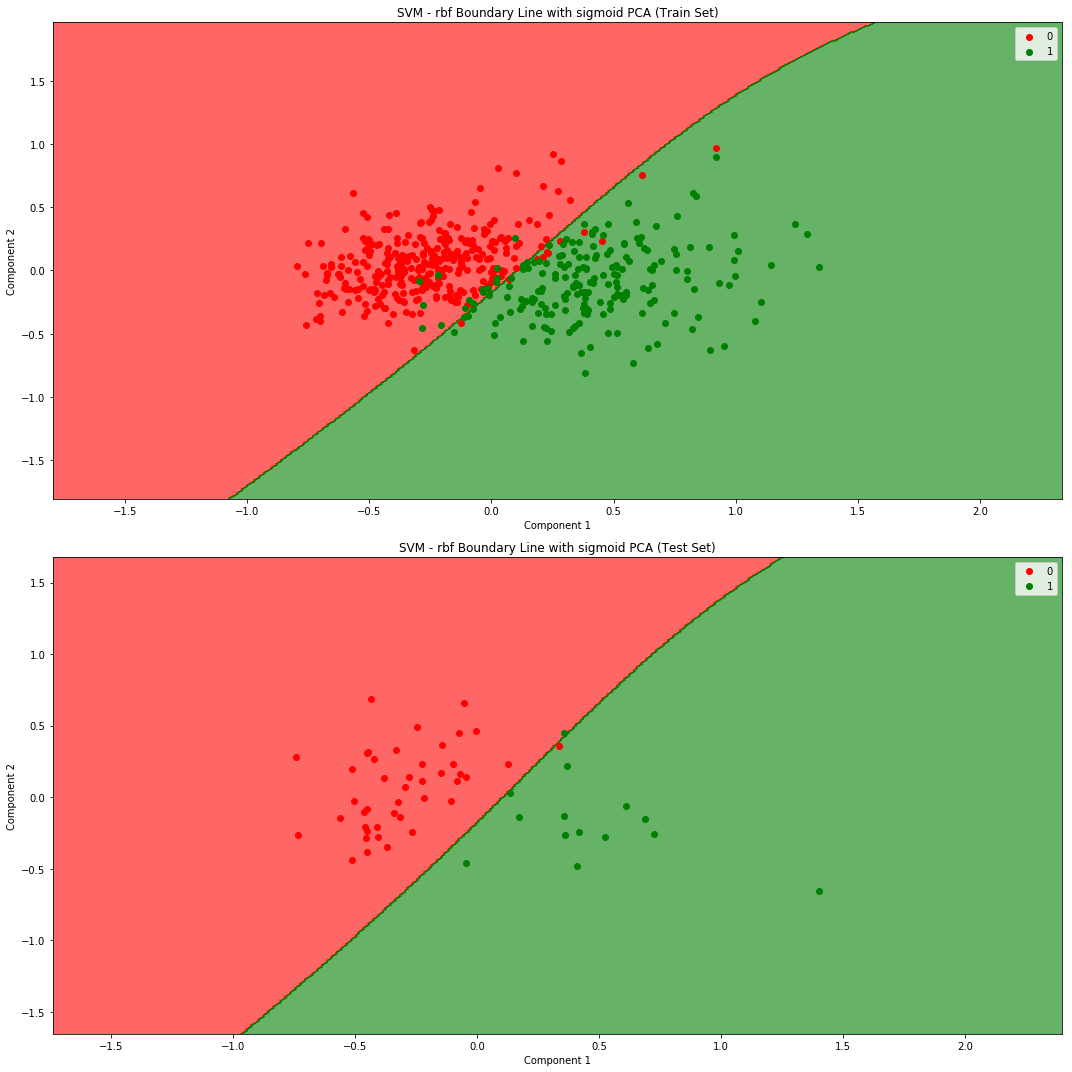

In [44]:
BoundaryLine('sigmoid', SVC(kernel = 'rbf'), "SVM - rbf")

[[42  1]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        43
          1       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        57



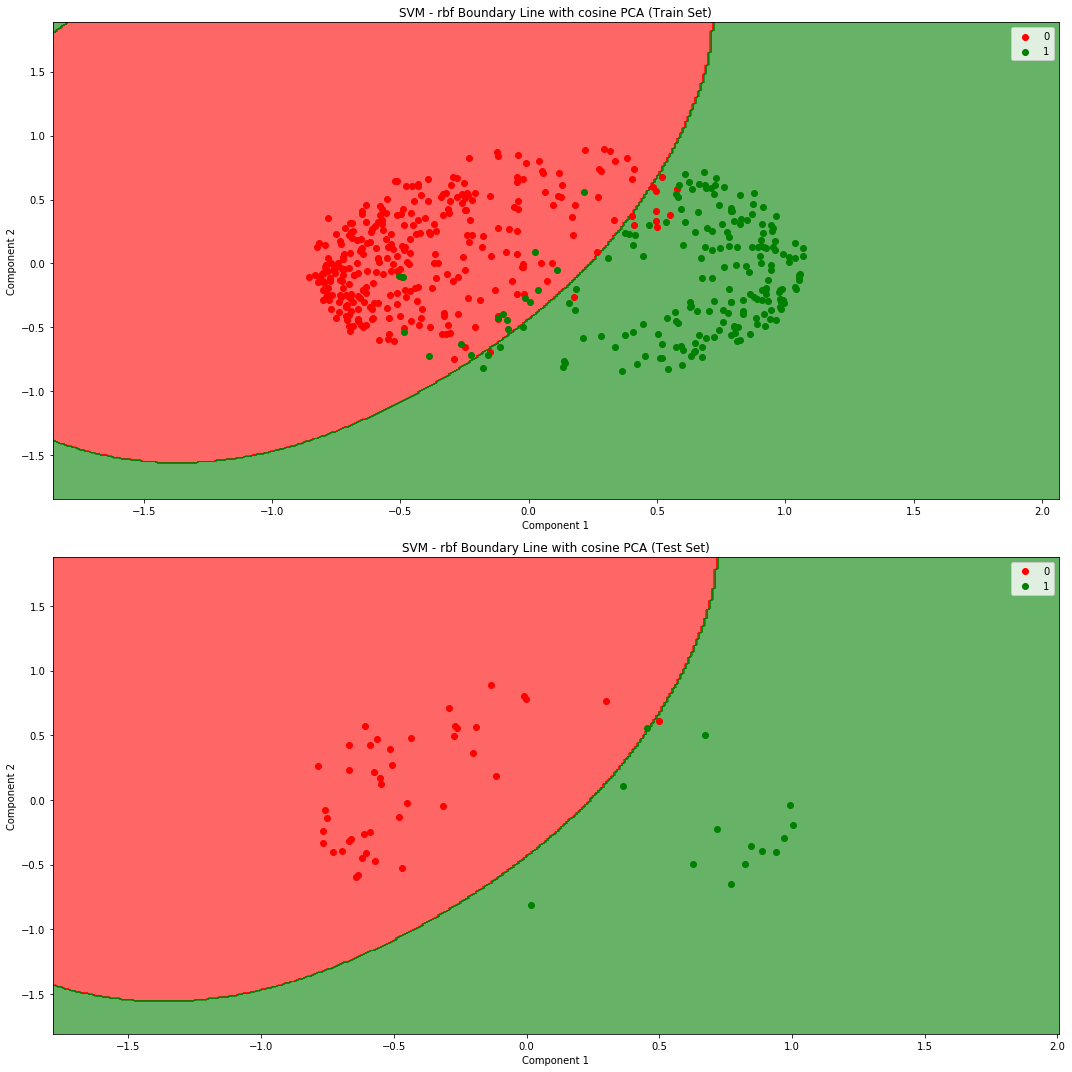

In [45]:
BoundaryLine('cosine', SVC(kernel = 'rbf'), "SVM - rbf")

[[43  0]
 [ 2 12]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        43
          1       1.00      0.86      0.92        14

avg / total       0.97      0.96      0.96        57



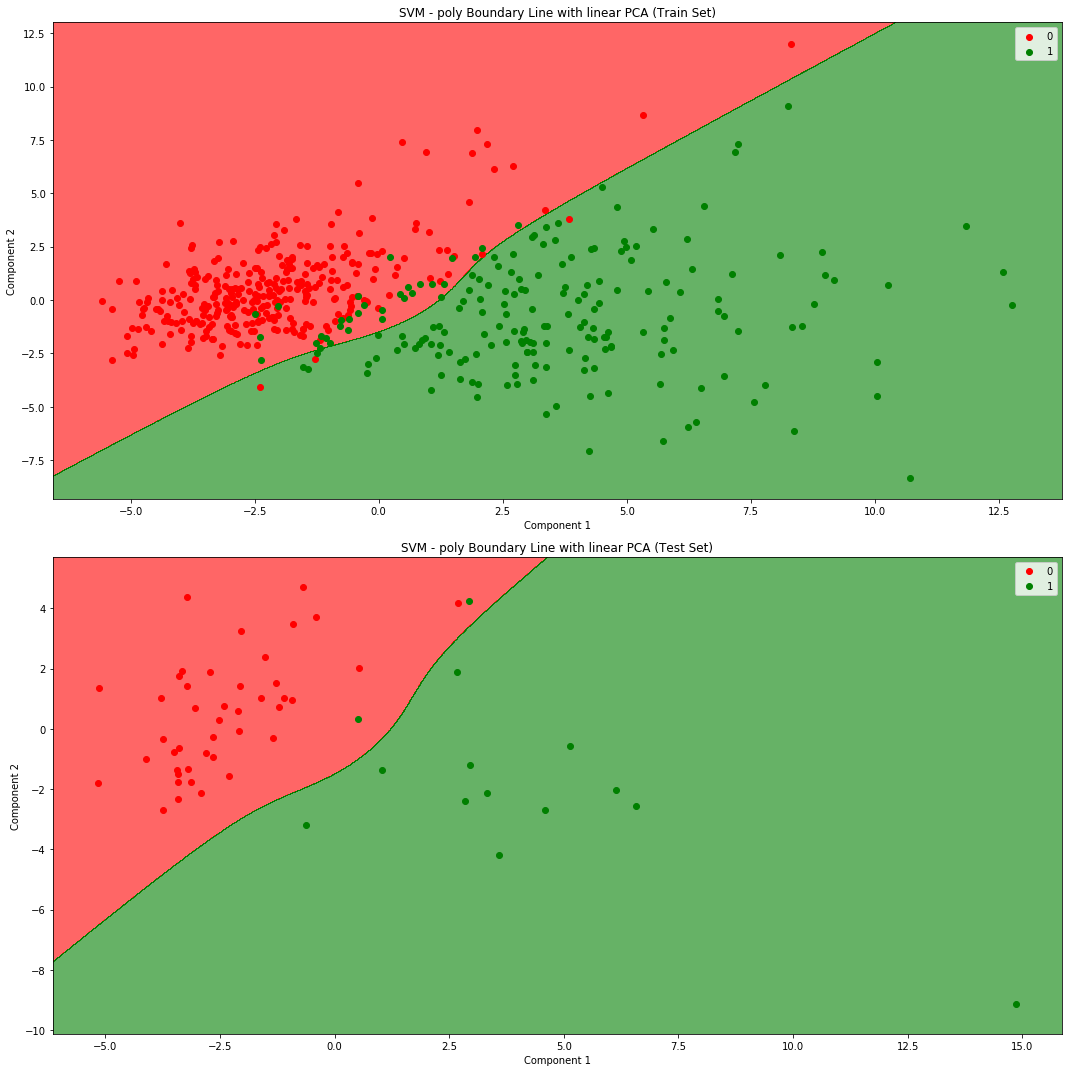

In [46]:
#Support Vector - Poly
BoundaryLine('linear', SVC(kernel = 'poly'), "SVM - poly")

[[43  0]
 [14  0]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86        43
          1       0.00      0.00      0.00        14

avg / total       0.57      0.75      0.65        57



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


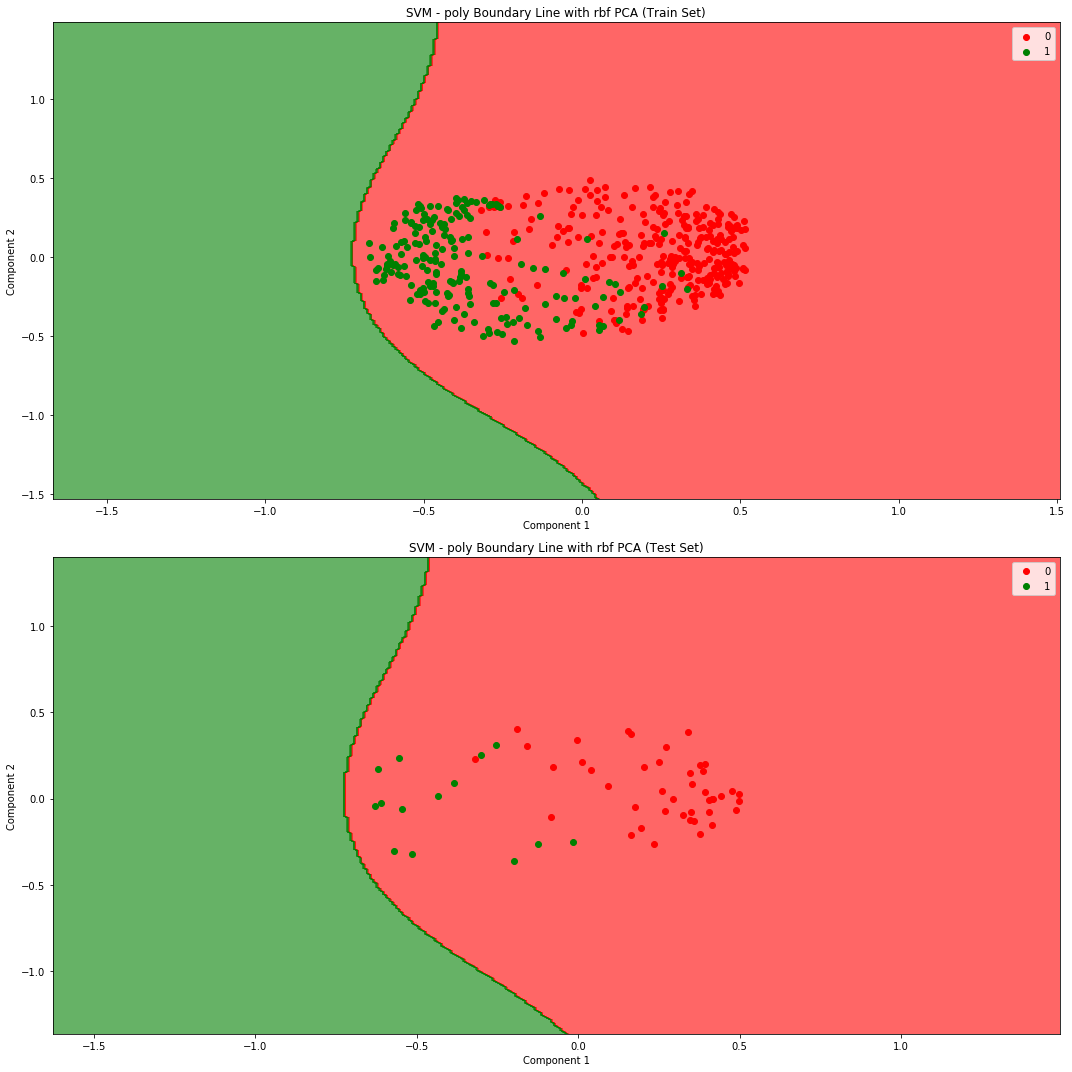

In [47]:
BoundaryLine('rbf', SVC(kernel = 'poly'), "SVM - poly")

[[43  0]
 [ 7  7]]
             precision    recall  f1-score   support

          0       0.86      1.00      0.92        43
          1       1.00      0.50      0.67        14

avg / total       0.89      0.88      0.86        57



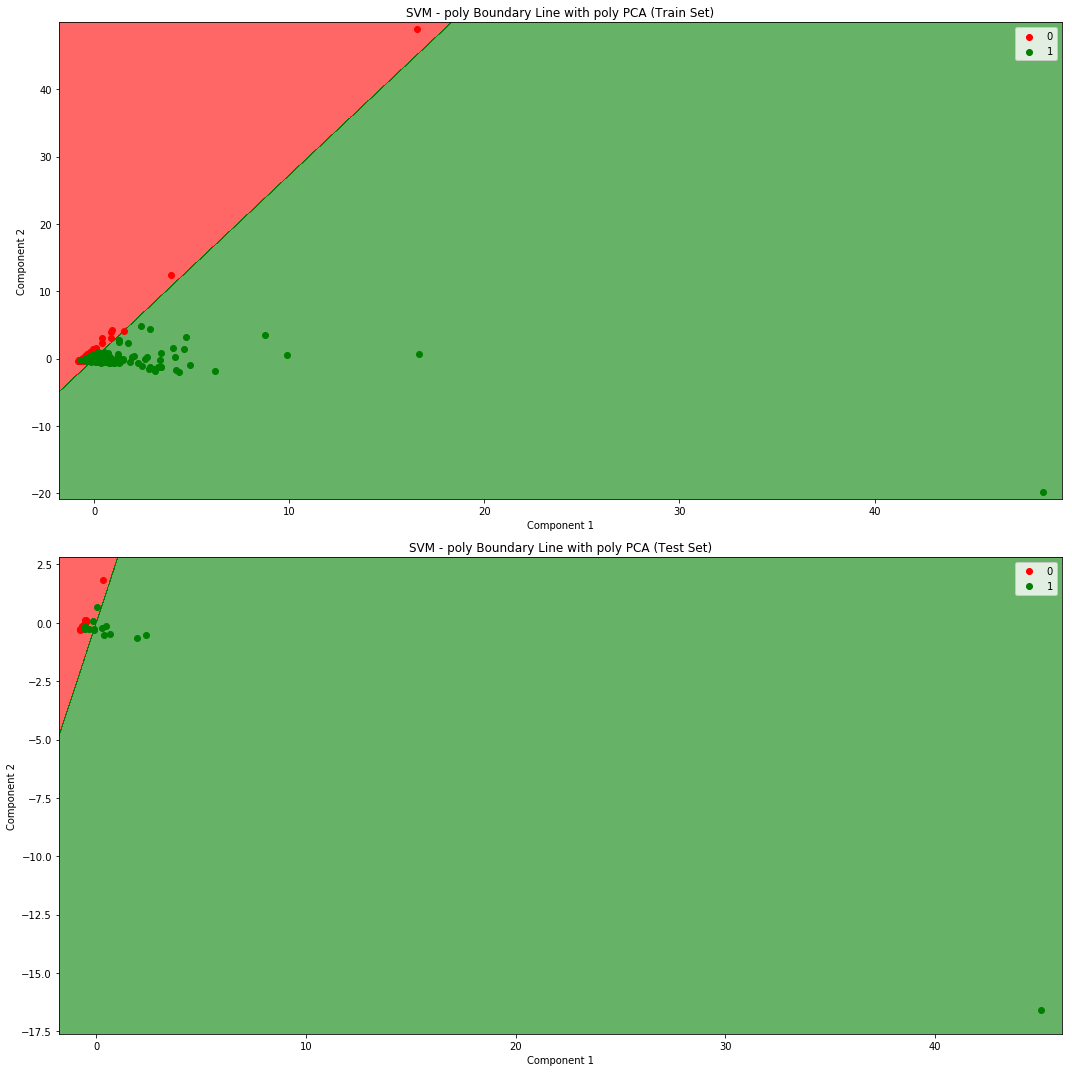

In [48]:
BoundaryLine('poly', SVC(kernel = 'poly'), "SVM - poly")

[[43  0]
 [12  2]]
             precision    recall  f1-score   support

          0       0.78      1.00      0.88        43
          1       1.00      0.14      0.25        14

avg / total       0.84      0.79      0.72        57



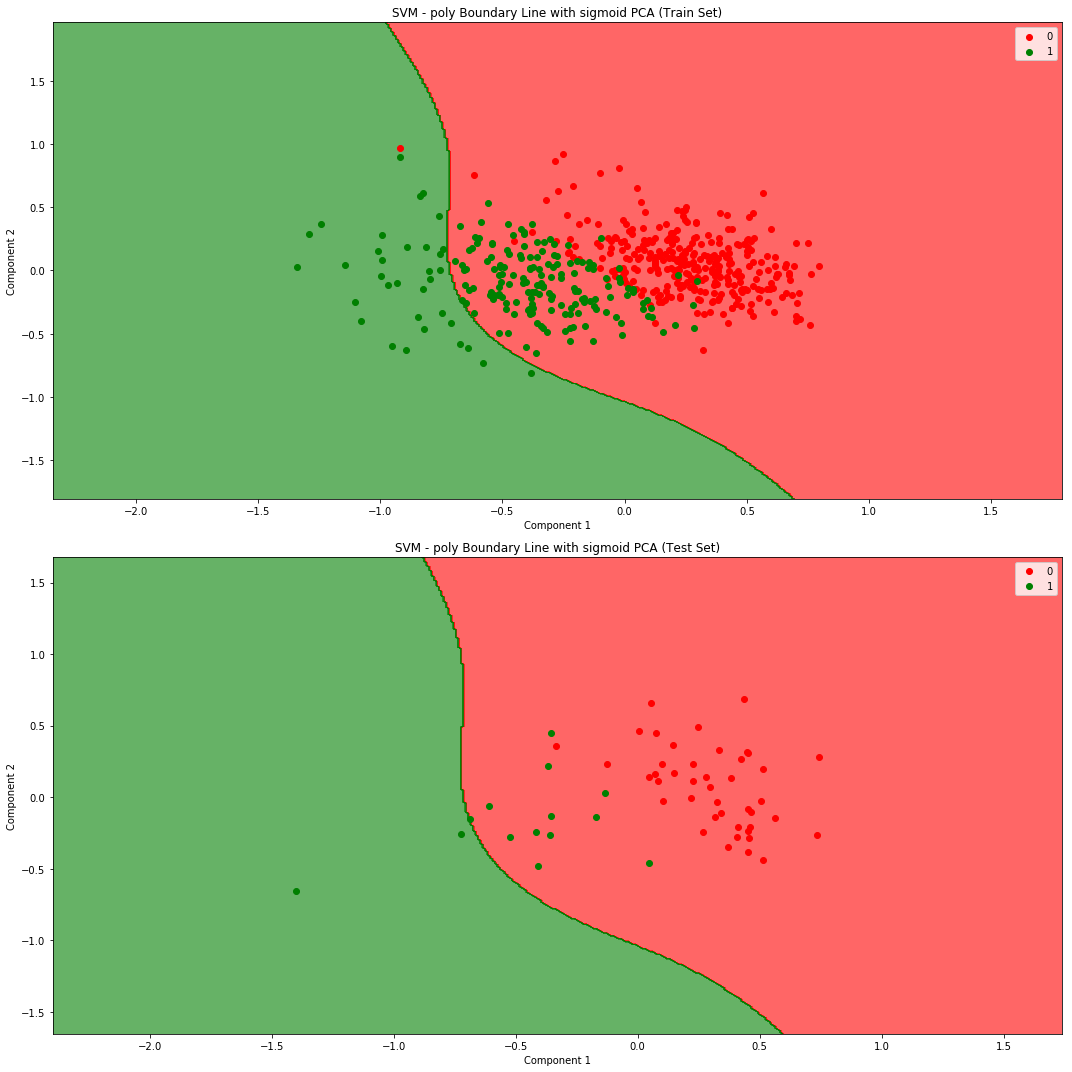

In [49]:
BoundaryLine('sigmoid', SVC(kernel = 'poly'), "SVM - poly")

[[43  0]
 [ 2 12]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        43
          1       1.00      0.86      0.92        14

avg / total       0.97      0.96      0.96        57



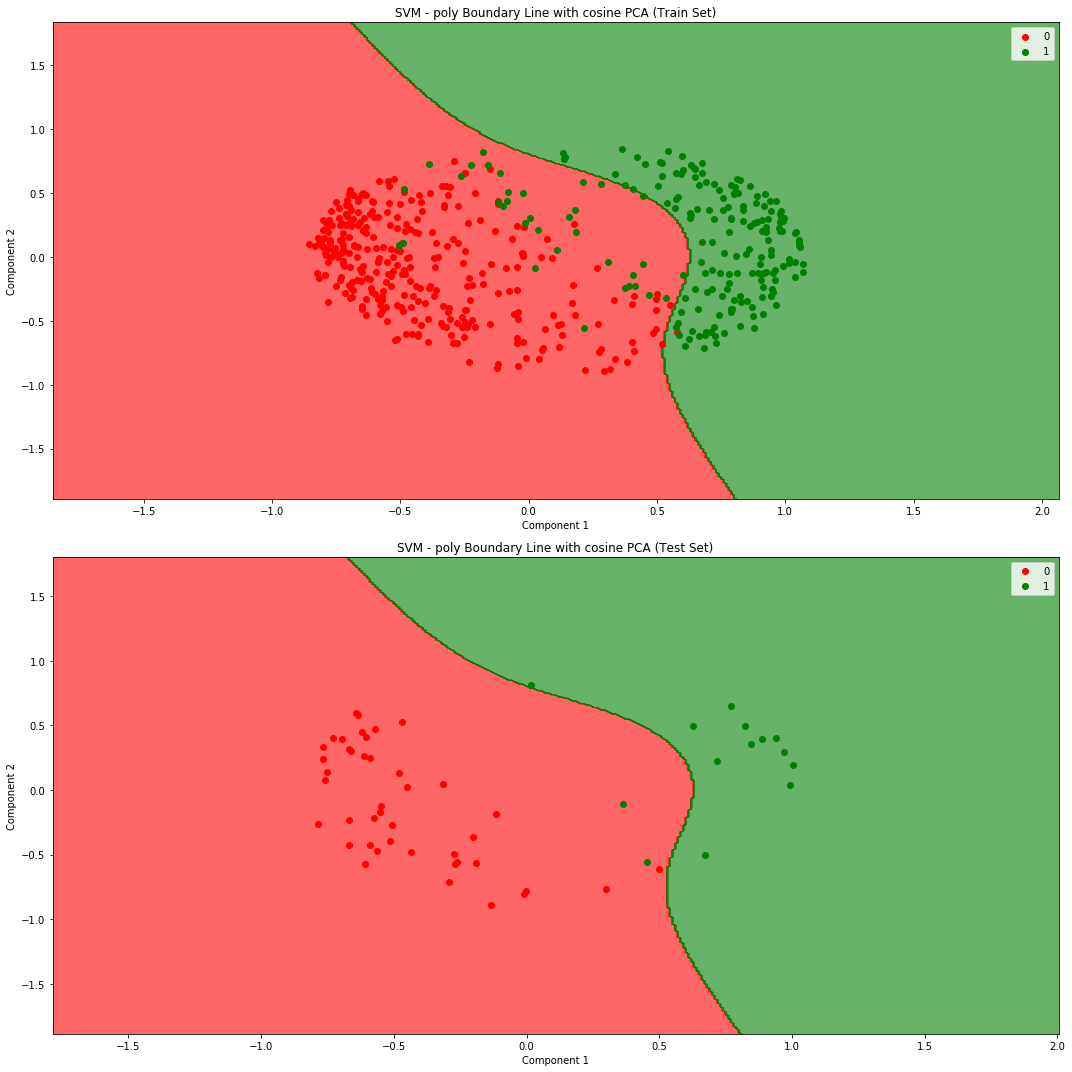

In [50]:
BoundaryLine('cosine', SVC(kernel = 'poly'), "SVM - poly")